Nosotros, Darwin Domingo Méndez `(2023-0769)` y Roither Sánchez Sosa `(2022-2111)`, haremos equipo para llevar a cabo un análisis exploratorio de datos (EDA) como parte de la materia de Procesamiento de Lenguaje Natural (NLP), impartida por el maestro Carlos Ogando. En este proyecto:

* Recopilaremos nóminas públicas de cinco instituciones distintas.
* Cargaremos estas nóminas en Python usando la librería Pandas, sin procesarlas previamente en Excel.
* Concatenaremos todas las nóminas en un solo dataset utilizando Pandas.
* Realizaremos un análisis de la calidad de los datos, identificando celdas nulas, mal formateadas y otros problemas.
* Calcularemos estadísticas básicas de las columnas, tales como promedio, mediana, mínimo, máximo y desviación estándar.
* Exploraremos las distribuciones de los datos para cada columna.
* Analizaremos las distribuciones de ingresos desglosadas por género, cargo, institución y otras variables relevantes.
* Identificaremos correlaciones entre diferentes variables.
* Reportaremos cualquier otro hallazgo importante que descubramos durante el análisis.
* Otros hallazgos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


## DATOS DE LA UAF

> Aqui exportamos los datos de nomina de la UAF (Unidad de Análisis Financiero) para mas tarde ver como hacemos un analisis exploratorio de los datos.




Se eliminaron las primeras 4 filas que contenían información del título, la fecha y encabezados de las columnas. Específicamente, se usó df_uaf.iloc[4:] para seleccionar las filas desde la quinta en adelante.

También se eliminó una fila al final del DataFrame que contenía información sobre quién elaboró el documento. Para ello, se usó df_uaf.drop(df_uaf.index[34], inplace=True).

In [ ]:
# Cargando los datos de la UAF


df_uaf = pd.read_excel('uaf.xlsx', index_col=0)
columnas = df_uaf.iloc[3]




df_uaf = df_uaf.iloc[4:]
df_uaf.columns = columnas
print(df_uaf.drop(df_uaf.index[34], inplace=True))
df_uaf = df_uaf.iloc[:34]



df_uaf


None


No.,Departamento,Cargos,Sexo,Sueldo Bruto,AFP,SFS,Dependiente Adicional,Salario Neto para Calculo del ISR,ISR,Seguro Complementario,Otros Descuentos,Devolución Gastos Educativos/Crédito Fiscal,Total Otros Descuentos,Total Descuentos,Salario a Pagar
1,Dirección General,Directora General,F,285000,8179.5,4943.8,NaN,271876.7,56552.04,NaN,25,NaN,25,69700.34,215299.66
2,Dpto. de Coordinación del Despacho,Asistente del Despacho,F,60000,1722,1824,NaN,56454,3486.68,NaN,25,NaN,25,7057.68,52942.32
3,Departamento de Comunicaciones,Diseñador Gráfico,F,43000,1234.1,1307.2,3024.9,37433.8,412.32,NaN,25,NaN,3049.9,6003.52,36996.48
4,Departamento de Comunicaciones,Recepcionista,F,40000,1148,1216,NaN,37636,442.65,NaN,25,NaN,25,2831.65,37168.35
5,Oficina de Acceso a la Información,Técnico de OAI,F,48000,1377.6,1459.2,NaN,45163.2,1571.73,NaN,25,NaN,25,4433.53,43566.47
6,División de Contabilidad,Contador,M,86000,2468.2,2614.4,NaN,80917.4,8812.22,NaN,25,NaN,25,13919.82,72080.18
7,División de Contabilidad,Contador,F,55000,1578.5,1672,NaN,51749.5,2559.68,NaN,25,NaN,25,5835.18,49164.82
8,División de Servicios Generales,Auxiliar Administrativo,M,35000,1004.5,1064,NaN,32931.5,0,NaN,25,NaN,25,2093.5,32906.5
9,División de Servicios Generales,Ayudante de Mantenimiento,M,25000,717.5,760,NaN,23522.5,0,NaN,25,NaN,25,1502.5,23497.5
10,División de Servicios Generales,Chofer,M,25000,717.5,760,NaN,23522.5,0,NaN,25,NaN,25,1502.5,23497.5


In [ ]:
df_uaf.columns

Index(['Departamento', 'Cargos', 'Sexo', 'Sueldo Bruto ', 'AFP', 'SFS',
       'Dependiente Adicional ', 'Salario Neto para Calculo del ISR', 'ISR',
       'Seguro Complementario', 'Otros Descuentos ',
       'Devolución  Gastos Educativos/Crédito Fiscal ',
       'Total Otros Descuentos', 'Total Descuentos', 'Salario a Pagar'],
      dtype='object', name='No.')

In [ ]:
df_uaf['Dependiente Adicional '].fillna(0, inplace=True)
df_uaf['Seguro Complementario'].fillna(0, inplace=True)
df_uaf['Devolución  Gastos Educativos/Crédito Fiscal '].fillna(0, inplace=True)
df_uaf['ISR'].fillna(0, inplace=True)

In [ ]:

df_uaf

No.,Departamento,Cargos,Sexo,Sueldo Bruto,AFP,SFS,Dependiente Adicional,Salario Neto para Calculo del ISR,ISR,Seguro Complementario,Otros Descuentos,Devolución Gastos Educativos/Crédito Fiscal,Total Otros Descuentos,Total Descuentos,Salario a Pagar
1,Dirección General,Directora General,F,285000,8179.5,4943.8,0.00,271876.7,56552.040000,0,25,0,25,69700.34,215299.66
2,Dpto. de Coordinación del Despacho,Asistente del Despacho,F,60000,1722,1824,0.00,56454,3486.680000,0,25,0,25,7057.68,52942.32
3,Departamento de Comunicaciones,Diseñador Gráfico,F,43000,1234.1,1307.2,3024.90,37433.8,412.320000,0,25,0,3049.9,6003.52,36996.48
4,Departamento de Comunicaciones,Recepcionista,F,40000,1148,1216,0.00,37636,442.650000,0,25,0,25,2831.65,37168.35
5,Oficina de Acceso a la Información,Técnico de OAI,F,48000,1377.6,1459.2,0.00,45163.2,1571.730000,0,25,0,25,4433.53,43566.47
6,División de Contabilidad,Contador,M,86000,2468.2,2614.4,0.00,80917.4,8812.220000,0,25,0,25,13919.82,72080.18
7,División de Contabilidad,Contador,F,55000,1578.5,1672,0.00,51749.5,2559.680000,0,25,0,25,5835.18,49164.82
8,División de Servicios Generales,Auxiliar Administrativo,M,35000,1004.5,1064,0.00,32931.5,0.000000,0,25,0,25,2093.5,32906.5
9,División de Servicios Generales,Ayudante de Mantenimiento,M,25000,717.5,760,0.00,23522.5,0.000000,0,25,0,25,1502.5,23497.5
10,División de Servicios Generales,Chofer,M,25000,717.5,760,0.00,23522.5,0.000000,0,25,0,25,1502.5,23497.5


In [ ]:
# cantidad de celdas nulas, cantidad de celdas mal formateadas
df_uaf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Departamento                                   34 non-null     object 
 1   Cargos                                         34 non-null     object 
 2   Sexo                                           34 non-null     object 
 3   Sueldo Bruto                                   34 non-null     object 
 4   AFP                                            34 non-null     object 
 5   SFS                                            34 non-null     object 
 6   Dependiente Adicional                          34 non-null     float64
 7   Salario Neto para Calculo del ISR              34 non-null     object 
 8   ISR                                            34 non-null     float64
 9   Seguro Complementario                          34 non-null   

In [ ]:
# Observando datos faltantes en la tabla de la uaf
df_uaf.isna().sum()

,0
No.,
Departamento,0
Cargos,0
Sexo,0
Sueldo Bruto,0
AFP,0
SFS,0
Dependiente Adicional,0
Salario Neto para Calculo del ISR,0
ISR,0


In [ ]:
df_uaf.columns = df_uaf.columns.str.lower()
df_uaf.head()

No.,departamento,cargos,sexo,sueldo bruto,afp,sfs,dependiente adicional,salario neto para calculo del isr,isr,seguro complementario,otros descuentos,devolución gastos educativos/crédito fiscal,total otros descuentos,total descuentos,salario a pagar
1,Dirección General,Directora General,F,285000,8179.5,4943.8,0.0,271876.7,56552.04,0,25,0,25,69700.34,215299.66
2,Dpto. de Coordinación del Despacho,Asistente del Despacho,F,60000,1722,1824,0.0,56454,3486.68,0,25,0,25,7057.68,52942.32
3,Departamento de Comunicaciones,Diseñador Gráfico,F,43000,1234.1,1307.2,3024.9,37433.8,412.32,0,25,0,3049.9,6003.52,36996.48
4,Departamento de Comunicaciones,Recepcionista,F,40000,1148,1216,0.0,37636,442.65,0,25,0,25,2831.65,37168.35
5,Oficina de Acceso a la Información,Técnico de OAI,F,48000,1377.6,1459.2,0.0,45163.2,1571.73,0,25,0,25,4433.53,43566.47


## Importando datos de la UASD

In [ ]:
# Cargando los datos de la UASD
df_uasd = pd.read_excel('uasd.xlsx', index_col=0)

columnas_uasd = df_uasd.iloc[10]


df_uasd.columns = columnas_uasd
df_uasd = df_uasd.iloc[11:]

# Mostrando todo menos la ultima fila, ya que obstruye
df_uasd = df_uasd.iloc[:-1]
df_uasd

No.,SEXO,CATEGORIA,Nombre_apellido,Departamento,Funcion_o_puesto,Estado,Desde,Sueldo_bruto,Otros_ingresos,Total_ingresos,ISR,AFP,SFS,Otros_descuentos,Total_descuentos,Total_neto
1,M,NaN,Jose Horacio Cabrera Tejada,RECTORIA,DIRECTOR GRAL DE TECNOLOGIA DE LA INFORMACION,DE CARRERA,1975-08-01 00:00:00,173389.33,48798.22,222187.55,26367.1,4605.93,4742.4,71324.74,107040.17,115147.38
2,F,NaN,ISABEL MARIA ULLOA PAYAMPS,DEPARTAMENTO DE PERSONAL ADMINISTRATIVO,Director de Recursos Humanos,DE CARRERA,1998-02-09 00:00:00,150291.03,75135.51,225426.54,23935.07,4313.35,4568.85,9271,42088.27,183338.27
3,F,NaN,Adela Jocelyn Rosario Gutierrez,RECTORIA,Asistente Ejecutivo Rectoria,DE CARRERA,1993-02-22 00:00:00,149865.45,74922.72,224788.17,23834.97,4301.14,4555.91,100584.78,133276.8,91511.37
4,F,NaN,Nadesha M Paniagua M,DEPARTAMENTO DE COMPRA DE CONTRATACIONES DE BI...,Director de Compras,DE CARRERA,1999-04-19 00:00:00,138486.03,69233.01,207719.04,21158.24,3974.55,4209.98,50444.27,79787.04,127932
5,F,NaN,YAKAIRA R. SORIANO,ECONOMATO UNIVERSITARIO,Administrador Economato Universitario,DE CARRERA,2008-10-14 00:00:00,138155.99,69067.99,207223.98,21080.61,3965.08,4199.94,49870.23,79115.86,128108.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,F,NaN,DELCIS MARIA DE LA ROSA PAREDES,UASD- HATO MAYOR,Conserje,DE CARRERA,2013-04-15 00:00:00,24224.21,0,24224.21,0,695.23,736.42,10571.2,12002.85,12221.36
4839,M,NaN,PORFIRIO VALDEZ HEREDIA,UASD BARAHONA,Conserje,DE CARRERA,2013-06-10 00:00:00,24224.21,0,24224.21,0,695.23,736.42,18657.43,20089.08,4135.13
4840,M,NaN,LUIS PEREZ CASTILLO,UASD BARAHONA,Conserje,DE CARRERA,2013-06-10 00:00:00,24224.21,0,24224.21,0,695.23,736.42,21631.47,23063.12,1161.09
4841,F,NaN,SANDRA JOSEFINA BONILLA PERALTA,UASD- MAO,Conserje,DE CARRERA,2012-01-14 00:00:00,24224.21,8942.95,33167.16,0,695.23,736.42,3706.6,5138.25,28028.91


In [ ]:
# Accediendo las primeras 5 filas de la nomina de la uasd
df_uasd.head()

No.,SEXO,CATEGORIA,Nombre_apellido,Departamento,Funcion_o_puesto,Estado,Desde,Sueldo_bruto,Otros_ingresos,Total_ingresos,ISR,AFP,SFS,Otros_descuentos,Total_descuentos,Total_neto
1,M,NaN,Jose Horacio Cabrera Tejada,RECTORIA,DIRECTOR GRAL DE TECNOLOGIA DE LA INFORMACION,DE CARRERA,1975-08-01 00:00:00,173389.33,48798.22,222187.55,26367.1,4605.93,4742.4,71324.74,107040.17,115147.38
2,F,NaN,ISABEL MARIA ULLOA PAYAMPS,DEPARTAMENTO DE PERSONAL ADMINISTRATIVO,Director de Recursos Humanos,DE CARRERA,1998-02-09 00:00:00,150291.03,75135.51,225426.54,23935.07,4313.35,4568.85,9271,42088.27,183338.27
3,F,NaN,Adela Jocelyn Rosario Gutierrez,RECTORIA,Asistente Ejecutivo Rectoria,DE CARRERA,1993-02-22 00:00:00,149865.45,74922.72,224788.17,23834.97,4301.14,4555.91,100584.78,133276.8,91511.37
4,F,NaN,Nadesha M Paniagua M,DEPARTAMENTO DE COMPRA DE CONTRATACIONES DE BI...,Director de Compras,DE CARRERA,1999-04-19 00:00:00,138486.03,69233.01,207719.04,21158.24,3974.55,4209.98,50444.27,79787.04,127932
5,F,NaN,YAKAIRA R. SORIANO,ECONOMATO UNIVERSITARIO,Administrador Economato Universitario,DE CARRERA,2008-10-14 00:00:00,138155.99,69067.99,207223.98,21080.61,3965.08,4199.94,49870.23,79115.86,128108.12


In [ ]:
# viendo información de los datos de la uasd
df_uasd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 1 to 4842
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SEXO              4840 non-null   object
 1   CATEGORIA         1 non-null      object
 2   Nombre_apellido   4842 non-null   object
 3   Departamento      4841 non-null   object
 4   Funcion_o_puesto  4842 non-null   object
 5   Estado            4842 non-null   object
 6   Desde             4842 non-null   object
 7   Sueldo_bruto      4842 non-null   object
 8   Otros_ingresos    4842 non-null   object
 9   Total_ingresos    4842 non-null   object
 10  ISR               4842 non-null   object
 11  AFP               4842 non-null   object
 12  SFS               4842 non-null   object
 13  Otros_descuentos  4842 non-null   object
 14  Total_descuentos  4842 non-null   object
 15  Total_neto        4842 non-null   object
dtypes: object(16)
memory usage: 772.1+ KB


In [ ]:
# Describiendo los datos de la uasd
df_uasd.describe()

No.,SEXO,CATEGORIA,Nombre_apellido,Departamento,Funcion_o_puesto,Estado,Desde,Sueldo_bruto,Otros_ingresos,Total_ingresos,ISR,AFP,SFS,Otros_descuentos,Total_descuentos,Total_neto
count,4840,1,4842,4841,4842,4842,4842,4842.00,4842,4842.00,4842,4842.00,4842.00,4842,4842.00,4842
unique,2,1,4842,193,678,1,1967,2574.00,1484,3158.00,1551,2223.00,2236.00,4574,4806.00,4534
top,M,ADJ,Jose Horacio Cabrera Tejada,DEPARTAMENTO DE SEGURIDAD,Conserje,DE CARRERA,2019-08-01 00:00:00,24224.75,0,24224.75,0,695.25,736.43,271,42046.47,1
freq,2683,1,1,288,458,4842,142,83.00,3124,82.00,2392,84.00,84.00,46,3.00,291


In [ ]:
# Observando datos faltantes en la tabla de la uasd
df_uasd.isna().sum()

,0
No.,
SEXO,2
CATEGORIA,4841
Nombre_apellido,0
Departamento,1
Funcion_o_puesto,0
Estado,0
Desde,0
Sueldo_bruto,0
Otros_ingresos,0


In [ ]:
# Mostrando la forma de la tabla de la uasd
print("La tabla de la uasd tiene {} filas, y {} columnas.".format(df_uasd.shape[0], df_uasd.shape[1]))

La tabla de la uasd tiene 4842 filas, y 16 columnas.


## Que significa esto allí arriba, de que en la columna categoría falten 4841 datos?


Pues de las 4841 entradas que hay, no hay una simple celda llena (quizas una sola), lo cual denota que hay que eliminar esa columna.

En cuanto a los elementos que faltan como los 2 de "sexo" y el unico de "departamento", podemos podemos eliminar esas filas, no son representan una parte significativa de los datos como para amputar.

In [ ]:
# Eliminando la columna categoría
df_uasd = df_uasd.drop("CATEGORIA", axis=1)
df_uasd = df_uasd.dropna()
df_uasd.head()

No.,SEXO,Nombre_apellido,Departamento,Funcion_o_puesto,Estado,Desde,Sueldo_bruto,Otros_ingresos,Total_ingresos,ISR,AFP,SFS,Otros_descuentos,Total_descuentos,Total_neto
1,M,Jose Horacio Cabrera Tejada,RECTORIA,DIRECTOR GRAL DE TECNOLOGIA DE LA INFORMACION,DE CARRERA,1975-08-01 00:00:00,173389.33,48798.22,222187.55,26367.1,4605.93,4742.4,71324.74,107040.17,115147.38
2,F,ISABEL MARIA ULLOA PAYAMPS,DEPARTAMENTO DE PERSONAL ADMINISTRATIVO,Director de Recursos Humanos,DE CARRERA,1998-02-09 00:00:00,150291.03,75135.51,225426.54,23935.07,4313.35,4568.85,9271,42088.27,183338.27
3,F,Adela Jocelyn Rosario Gutierrez,RECTORIA,Asistente Ejecutivo Rectoria,DE CARRERA,1993-02-22 00:00:00,149865.45,74922.72,224788.17,23834.97,4301.14,4555.91,100584.78,133276.8,91511.37
4,F,Nadesha M Paniagua M,DEPARTAMENTO DE COMPRA DE CONTRATACIONES DE BI...,Director de Compras,DE CARRERA,1999-04-19 00:00:00,138486.03,69233.01,207719.04,21158.24,3974.55,4209.98,50444.27,79787.04,127932
5,F,YAKAIRA R. SORIANO,ECONOMATO UNIVERSITARIO,Administrador Economato Universitario,DE CARRERA,2008-10-14 00:00:00,138155.99,69067.99,207223.98,21080.61,3965.08,4199.94,49870.23,79115.86,128108.12


In [ ]:
# verificando los datos faltantes de la uasd denuevo.

df_uasd.isna().sum()

,0
No.,
SEXO,0
Nombre_apellido,0
Departamento,0
Funcion_o_puesto,0
Estado,0
Desde,0
Sueldo_bruto,0
Otros_ingresos,0
Total_ingresos,0


### Podemos observar allí arriba que los no falta un simple dato, segun nuestro conteo.

Ahora convirtamos los nombres de las columnas a minusculas

In [ ]:
df_uasd.columns = df_uasd.columns.str.lower()
df_uasd.head()

No.,sexo,nombre_apellido,departamento,funcion_o_puesto,estado,desde,sueldo_bruto,otros_ingresos,total_ingresos,isr,afp,sfs,otros_descuentos,total_descuentos,total_neto
1,M,Jose Horacio Cabrera Tejada,RECTORIA,DIRECTOR GRAL DE TECNOLOGIA DE LA INFORMACION,DE CARRERA,1975-08-01 00:00:00,173389.33,48798.22,222187.55,26367.1,4605.93,4742.4,71324.74,107040.17,115147.38
2,F,ISABEL MARIA ULLOA PAYAMPS,DEPARTAMENTO DE PERSONAL ADMINISTRATIVO,Director de Recursos Humanos,DE CARRERA,1998-02-09 00:00:00,150291.03,75135.51,225426.54,23935.07,4313.35,4568.85,9271,42088.27,183338.27
3,F,Adela Jocelyn Rosario Gutierrez,RECTORIA,Asistente Ejecutivo Rectoria,DE CARRERA,1993-02-22 00:00:00,149865.45,74922.72,224788.17,23834.97,4301.14,4555.91,100584.78,133276.8,91511.37
4,F,Nadesha M Paniagua M,DEPARTAMENTO DE COMPRA DE CONTRATACIONES DE BI...,Director de Compras,DE CARRERA,1999-04-19 00:00:00,138486.03,69233.01,207719.04,21158.24,3974.55,4209.98,50444.27,79787.04,127932
5,F,YAKAIRA R. SORIANO,ECONOMATO UNIVERSITARIO,Administrador Economato Universitario,DE CARRERA,2008-10-14 00:00:00,138155.99,69067.99,207223.98,21080.61,3965.08,4199.94,49870.23,79115.86,128108.12


## Importación de datos de Opret

In [ ]:
df_opret = pd.read_excel("opret.xlsx")
df_opret.iloc[8:]

old_columnas_opret = df_opret.iloc[8]
df_opret.columns = old_columnas_opret.values.tolist()
df_opret = df_opret[9:]
df_opret

columnas_opret_new = old_columnas_opret.dropna().values.tolist()

opret_new_df = pd.DataFrame(columns=columnas_opret_new)

for i in range(len(columnas_opret_new)):
    opret_new_df[columnas_opret_new[i]] = df_opret[columnas_opret_new[i]]



opret_new_df

,NO.,NOMBRE,GENERO,DEPARTAMENTO,POSICION,INGRESO,HASTA,ESTADO,BRUTO,AFP,SFS,ISR,DESC.,DESC.,NETO
9,1,JOANNY DAJAIRA GAUTIER HERNANDEZ,F,DEPTO. DE CONTABILIDAD,ENCARGADO (A) INT. SECCION DE RECAUDACION,2008-01-10 00:00:00,Designado/Carrera Administrativa,NaN,70000,-2009,-2128,-5368.45,-25,-9530.45,60469.55
10,2,KATERYN MANUELA JACINTO CABRERA,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-01-10 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,-132.15,-25,-2391.13,35408.87
11,3,NOEMI JOSELYN JAVIER RUIZ,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-12-01 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,0,-1537.45,-3771.43,34028.57
12,4,GUENY CUNDALINA MARQUEZ JIMENEZ,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,0,-3049.9,-5283.88,32516.12
13,5,TAMILKA PAOLA MERAN BORGE,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,0,-1537.45,-3771.43,34028.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,Licda. Rossybel Consuelo Abreu Paulino,NaN,NaN,NaN,Licda. Marlene Vásquez sánchez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Seguir viendo cuales filas estan dislocadas.
opret_new_df.iloc[895:]

,NO.,NOMBRE,GENERO,DEPARTAMENTO,POSICION,INGRESO,HASTA,ESTADO,BRUTO,AFP,SFS,ISR,DESC.,DESC.,NETO
904,738,RAMON EMILIO DIAZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,PLOMERO,2021-01-01 00:00:00,Designado,NaN,30000,-861,-912,0,-25,-1798,28202
905,739,MAGALY NUÑEZ,M,DIVISION DE SERVICIOS GENERALES,SUPERVISORA DE MAYORDOMIA,2021-01-01 00:00:00,Designado,NaN,26250,-753.38,-798,0,-25,-1576.38,24673.62
906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908,Revisado por:,NaN,NaN,NaN,Preparado por:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,Licda. Rossybel Consuelo Abreu Paulino,NaN,NaN,NaN,Licda. Marlene Vásquez sánchez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,Encargada Int. de Departamento Recursos Humanos,NaN,NaN,NaN,Encargada Div. Registro y control y Nómina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Como podemos observar allí arriba, esos son metadatos, del documento, cosas como quien lo hizo, o preparó.


Así que eliminemos esa parte.


In [ ]:
# Opret new_df va a ser igual a todo lo que esta antes y lo que incluye la fila 895
opret_new_df = opret_new_df.iloc[:895]
opret_new_df

,NO.,NOMBRE,GENERO,DEPARTAMENTO,POSICION,INGRESO,HASTA,ESTADO,BRUTO,AFP,SFS,ISR,DESC.,DESC.,NETO
9,1,JOANNY DAJAIRA GAUTIER HERNANDEZ,F,DEPTO. DE CONTABILIDAD,ENCARGADO (A) INT. SECCION DE RECAUDACION,2008-01-10 00:00:00,Designado/Carrera Administrativa,NaN,70000,-2009,-2128,-5368.45,-25,-9530.45,60469.55
10,2,KATERYN MANUELA JACINTO CABRERA,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-01-10 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,-132.15,-25,-2391.13,35408.87
11,3,NOEMI JOSELYN JAVIER RUIZ,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-12-01 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,0,-1537.45,-3771.43,34028.57
12,4,GUENY CUNDALINA MARQUEZ JIMENEZ,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,0,-3049.9,-5283.88,32516.12
13,5,TAMILKA PAOLA MERAN BORGE,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,NaN,37800,-1084.86,-1149.12,0,-1537.45,-3771.43,34028.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,733,HEIDY MIESES OLIVERO,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,ELECTRICISTA,2021-01-01 00:00:00,Designado,NaN,31500,-904.05,-957.6,0,-25,-1886.65,29613.35
900,734,LUIS EMIL MIESES,M,SECCION DE TRANSPORTACION Y EQUIPOS,ELECTRICISTA,2021-01-01 00:00:00,Designado,NaN,26250,-753.38,-798,0,-25,-1576.38,24673.62
901,735,JORDAN RAFAEL THEN HERNANDEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,JARDINERO,2021-01-01 00:00:00,Designado,NaN,26250,-753.38,-798,0,-25,-1576.38,24673.62
902,736,CRISTIAN ANTONIO GUZMAN HENRIQUEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,PINTOR,2021-01-01 00:00:00,Designado,NaN,26250,-753.38,-798,0,-25,-1576.38,24673.62


In [ ]:
# Verificamos datos faltantes
opret_new_df.isna().sum()

,0
NO.,143
NOMBRE,143
GENERO,143
DEPARTAMENTO,143
POSICION,143
INGRESO,143
HASTA,143
ESTADO,880
BRUTO,143
AFP,143


In [ ]:
# Veamos la forma de la tabla.
print("La tabla de la opret tiene {} filas, y {} columnas.".format(opret_new_df.shape[0], opret_new_df.shape[1]))

La tabla de la opret tiene 895 filas, y 15 columnas.


### Notamos que hay celdas en blanco consistentes, lo que puede significar que en realidad no haya datos faltantes, sinó que hallan saltos de lineas.

Verifiquemos eso!!

Pero primero eliminemos la columna que se llama "HASTA", y pasemos sus datos a la columna que se llama estado, ya que hay mucha probabilidad que el contenido de estas, este dislocado.

In [ ]:
opret_new_df = opret_new_df.drop("ESTADO", axis=1)
opret_new_df = opret_new_df.rename(columns={"HASTA": "ESTADO"})
opret_new_df

,NO.,NOMBRE,GENERO,DEPARTAMENTO,POSICION,INGRESO,ESTADO,BRUTO,AFP,SFS,ISR,DESC.,DESC.,NETO
9,1,JOANNY DAJAIRA GAUTIER HERNANDEZ,F,DEPTO. DE CONTABILIDAD,ENCARGADO (A) INT. SECCION DE RECAUDACION,2008-01-10 00:00:00,Designado/Carrera Administrativa,70000,-2009,-2128,-5368.45,-25,-9530.45,60469.55
10,2,KATERYN MANUELA JACINTO CABRERA,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-01-10 00:00:00,Designado,37800,-1084.86,-1149.12,-132.15,-25,-2391.13,35408.87
11,3,NOEMI JOSELYN JAVIER RUIZ,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,-3771.43,34028.57
12,4,GUENY CUNDALINA MARQUEZ JIMENEZ,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-3049.9,-5283.88,32516.12
13,5,TAMILKA PAOLA MERAN BORGE,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,-3771.43,34028.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,733,HEIDY MIESES OLIVERO,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,ELECTRICISTA,2021-01-01 00:00:00,Designado,31500,-904.05,-957.6,0,-25,-1886.65,29613.35
900,734,LUIS EMIL MIESES,M,SECCION DE TRANSPORTACION Y EQUIPOS,ELECTRICISTA,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,-1576.38,24673.62
901,735,JORDAN RAFAEL THEN HERNANDEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,JARDINERO,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,-1576.38,24673.62
902,736,CRISTIAN ANTONIO GUZMAN HENRIQUEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,PINTOR,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,-1576.38,24673.62


In [ ]:
# Eliminando una columna duplicada.
opret_new_df = opret_new_df.loc[:, ~opret_new_df.columns.duplicated()]
opret_new_df

,NO.,NOMBRE,GENERO,DEPARTAMENTO,POSICION,INGRESO,ESTADO,BRUTO,AFP,SFS,ISR,DESC.,NETO
9,1,JOANNY DAJAIRA GAUTIER HERNANDEZ,F,DEPTO. DE CONTABILIDAD,ENCARGADO (A) INT. SECCION DE RECAUDACION,2008-01-10 00:00:00,Designado/Carrera Administrativa,70000,-2009,-2128,-5368.45,-25,60469.55
10,2,KATERYN MANUELA JACINTO CABRERA,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-01-10 00:00:00,Designado,37800,-1084.86,-1149.12,-132.15,-25,35408.87
11,3,NOEMI JOSELYN JAVIER RUIZ,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,34028.57
12,4,GUENY CUNDALINA MARQUEZ JIMENEZ,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-3049.9,32516.12
13,5,TAMILKA PAOLA MERAN BORGE,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,34028.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,733,HEIDY MIESES OLIVERO,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,ELECTRICISTA,2021-01-01 00:00:00,Designado,31500,-904.05,-957.6,0,-25,29613.35
900,734,LUIS EMIL MIESES,M,SECCION DE TRANSPORTACION Y EQUIPOS,ELECTRICISTA,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62
901,735,JORDAN RAFAEL THEN HERNANDEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,JARDINERO,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62
902,736,CRISTIAN ANTONIO GUZMAN HENRIQUEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,PINTOR,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62


In [ ]:
# observamos los datos faltantes denuevo.

opret_new_df.isna().sum()


,0
NO.,143
NOMBRE,143
GENERO,143
DEPARTAMENTO,143
POSICION,143
INGRESO,143
ESTADO,143
BRUTO,143
AFP,143
SFS,143


In [ ]:
# Eliminemos elementos cuyo nombre sea el mismo que las columnas, para evitar duplicados.

opret_new_df = opret_new_df[opret_new_df["NOMBRE"] != "NOMBRE"]
opret_new_df = opret_new_df[opret_new_df["GENERO"] != "GENERO"]
opret_new_df = opret_new_df[opret_new_df["DEPARTAMENTO"] != "DEPARTAMENTO"]
opret_new_df = opret_new_df[opret_new_df["POSICION"] != "POSICION"]
opret_new_df = opret_new_df[opret_new_df["INGRESO"] != "INGRESO"]
opret_new_df = opret_new_df[opret_new_df["ESTADO"] != "ESTADO"]
opret_new_df = opret_new_df[opret_new_df["BRUTO"] != "BRUTO"]
opret_new_df = opret_new_df[opret_new_df["AFP"] != "AFP"]
opret_new_df = opret_new_df[opret_new_df["SFS"] != "SFS"]
opret_new_df = opret_new_df[opret_new_df["ISR"] != "ISR"]
opret_new_df = opret_new_df[opret_new_df["DESC."] != "DESC."]
opret_new_df = opret_new_df[opret_new_df["NETO"] != "NETO"]

opret_new_df

,NO.,NOMBRE,GENERO,DEPARTAMENTO,POSICION,INGRESO,ESTADO,BRUTO,AFP,SFS,ISR,DESC.,NETO
9,1,JOANNY DAJAIRA GAUTIER HERNANDEZ,F,DEPTO. DE CONTABILIDAD,ENCARGADO (A) INT. SECCION DE RECAUDACION,2008-01-10 00:00:00,Designado/Carrera Administrativa,70000,-2009,-2128,-5368.45,-25,60469.55
10,2,KATERYN MANUELA JACINTO CABRERA,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-01-10 00:00:00,Designado,37800,-1084.86,-1149.12,-132.15,-25,35408.87
11,3,NOEMI JOSELYN JAVIER RUIZ,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,34028.57
12,4,GUENY CUNDALINA MARQUEZ JIMENEZ,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-3049.9,32516.12
13,5,TAMILKA PAOLA MERAN BORGE,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,34028.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,733,HEIDY MIESES OLIVERO,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,ELECTRICISTA,2021-01-01 00:00:00,Designado,31500,-904.05,-957.6,0,-25,29613.35
900,734,LUIS EMIL MIESES,M,SECCION DE TRANSPORTACION Y EQUIPOS,ELECTRICISTA,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62
901,735,JORDAN RAFAEL THEN HERNANDEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,JARDINERO,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62
902,736,CRISTIAN ANTONIO GUZMAN HENRIQUEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,PINTOR,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62


In [ ]:
opret_new_df.isna().sum()

,0
NO.,143
NOMBRE,143
GENERO,143
DEPARTAMENTO,143
POSICION,143
INGRESO,143
ESTADO,143
BRUTO,143
AFP,143
SFS,143


In [ ]:
# Ahora eliminemos los datos faltantes.
opret_new_df = opret_new_df.dropna()
opret_new_df.isna().sum()

,0
NO.,0
NOMBRE,0
GENERO,0
DEPARTAMENTO,0
POSICION,0
INGRESO,0
ESTADO,0
BRUTO,0
AFP,0
SFS,0


In [ ]:
# Ahora convertamos los nombres de las columnas a minusculas.
opret_new_df.columns = opret_new_df.columns.str.lower()
opret_new_df

,no.,nombre,genero,departamento,posicion,ingreso,estado,bruto,afp,sfs,isr,desc.,neto
9,1,JOANNY DAJAIRA GAUTIER HERNANDEZ,F,DEPTO. DE CONTABILIDAD,ENCARGADO (A) INT. SECCION DE RECAUDACION,2008-01-10 00:00:00,Designado/Carrera Administrativa,70000,-2009,-2128,-5368.45,-25,60469.55
10,2,KATERYN MANUELA JACINTO CABRERA,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-01-10 00:00:00,Designado,37800,-1084.86,-1149.12,-132.15,-25,35408.87
11,3,NOEMI JOSELYN JAVIER RUIZ,F,DEPT. DE OPERACIONES,CONDUCTOR (A),2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,34028.57
12,4,GUENY CUNDALINA MARQUEZ JIMENEZ,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-3049.9,32516.12
13,5,TAMILKA PAOLA MERAN BORGE,F,DEPT. DE OPERACIONES,OPERADORA DE ESTACION,2008-12-01 00:00:00,Designado,37800,-1084.86,-1149.12,0,-1537.45,34028.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,733,HEIDY MIESES OLIVERO,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,ELECTRICISTA,2021-01-01 00:00:00,Designado,31500,-904.05,-957.6,0,-25,29613.35
900,734,LUIS EMIL MIESES,M,SECCION DE TRANSPORTACION Y EQUIPOS,ELECTRICISTA,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62
901,735,JORDAN RAFAEL THEN HERNANDEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,JARDINERO,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62
902,736,CRISTIAN ANTONIO GUZMAN HENRIQUEZ,M,DIVISION DE MANTENIMIENTO DE OBRAS CIVILES,PINTOR,2021-01-01 00:00:00,Designado,26250,-753.38,-798,0,-25,24673.62


## Importación de los datos de (sns), Servicio Nacional de Salud

In [ ]:
df_sns =  pd.read_excel("sns.xlsx")
df_sns.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,SERVICIO NACIONAL DE SALUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Nómina de Sueldos Personal Fijo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Correspondiente al mes de enero del año 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REG. NO.,NOMBRES,SEXO,REGION,PROVINCIA,DIRECCION O DEPARTAMENTO,CARGO,CATEGORIA DE SERVIDOR,SUELDO BRUTO,AFP,ISR,SFS,OTROS,SUELDO NETO


In [ ]:
# Empecemos mostrar esos datos desde la posición 4, ya que esa es la posición que tiene los nombres de las columnas
df_sns_columnas = df_sns.iloc[4]

df_sns.columns = df_sns_columnas.values.tolist()

df_sns = df_sns[5:]
df_sns

,REG. NO.,NOMBRES,SEXO,REGION,PROVINCIA,DIRECCION O DEPARTAMENTO,CARGO,CATEGORIA DE SERVIDOR,SUELDO BRUTO,AFP,ISR,SFS,OTROS,SUELDO NETO
5,1,JANET PERALTA NUÑEZ,F,0,DISTRITO NACIONAL,BARRANCON,AUXILIAR DE ENFERMERIA,FIJO,36605.08,959.21,0,1016.03,1937.45,32692.39
6,2,MARTINA DOMINGUEZ DE DOMINGUEZ,F,0,DISTRITO NACIONAL,BARRANCON,CONSERJE,FIJO,11000,315.7,0,334.4,614,9735.9
7,3,MARIALY DOMINGUEZ DOMINGUEZ,F,0,DISTRITO NACIONAL,BARRANCON,PROMOTOR DE SALUD,FIJO,10000,287,0,304,25,9384
8,4,LILIANA GUTIERREZ DIAZ,F,0,DISTRITO NACIONAL,BARRANCON,PROMOTORA DE SALUD,FIJO,10000,287,0,304,25,9384
9,5,YSAIAS REYNOSO,M,0,DISTRITO NACIONAL,BARRANCON,VIGILANTE,FIJO,12100,347.27,0,367.84,25,11359.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78570,78566,JUAN DOMINGO LEOCADIO GUILLOT,M,8,SANCHEZ RAMIREZ,HOSPITAL MUNICIPAL DE FANTINO,VIGILANTE,FIJO,10000,287,0,304,25,9384
78571,78567,AQUILINO MENDOZA HERNANDEZ,M,8,SANCHEZ RAMIREZ,HOSPITAL MUNICIPAL DE FANTINO,VIGILANTE,FIJO,10000,287,0,304,25,9384
78572,78568,YDALIA GUZMAN MOSQUEA DE GARCIA,F,8,SANCHEZ RAMIREZ,UNAP - CLUB ROTATORIO (ONG),AUXILIAR DE ENFERMERIA,FIJO,39788.13,959.21,469.18,1016.03,13790.67,23553.04
78573,78569,CECILIA BAUTISTA SANCHEZ,F,8,SANCHEZ RAMIREZ,UNAP - CLUB ROTATORIO (ONG),CONSERJE,FIJO,11000,315.7,0,334.4,25,10324.9


In [ ]:
# Eliminemos el numero de registro, que es redundante.
df_sns = df_sns.drop("REG. NO.", axis=1)

df_sns

,NOMBRES,SEXO,REGION,PROVINCIA,DIRECCION O DEPARTAMENTO,CARGO,CATEGORIA DE SERVIDOR,SUELDO BRUTO,AFP,ISR,SFS,OTROS,SUELDO NETO
5,JANET PERALTA NUÑEZ,F,0,DISTRITO NACIONAL,BARRANCON,AUXILIAR DE ENFERMERIA,FIJO,36605.08,959.21,0,1016.03,1937.45,32692.39
6,MARTINA DOMINGUEZ DE DOMINGUEZ,F,0,DISTRITO NACIONAL,BARRANCON,CONSERJE,FIJO,11000,315.7,0,334.4,614,9735.9
7,MARIALY DOMINGUEZ DOMINGUEZ,F,0,DISTRITO NACIONAL,BARRANCON,PROMOTOR DE SALUD,FIJO,10000,287,0,304,25,9384
8,LILIANA GUTIERREZ DIAZ,F,0,DISTRITO NACIONAL,BARRANCON,PROMOTORA DE SALUD,FIJO,10000,287,0,304,25,9384
9,YSAIAS REYNOSO,M,0,DISTRITO NACIONAL,BARRANCON,VIGILANTE,FIJO,12100,347.27,0,367.84,25,11359.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78570,JUAN DOMINGO LEOCADIO GUILLOT,M,8,SANCHEZ RAMIREZ,HOSPITAL MUNICIPAL DE FANTINO,VIGILANTE,FIJO,10000,287,0,304,25,9384
78571,AQUILINO MENDOZA HERNANDEZ,M,8,SANCHEZ RAMIREZ,HOSPITAL MUNICIPAL DE FANTINO,VIGILANTE,FIJO,10000,287,0,304,25,9384
78572,YDALIA GUZMAN MOSQUEA DE GARCIA,F,8,SANCHEZ RAMIREZ,UNAP - CLUB ROTATORIO (ONG),AUXILIAR DE ENFERMERIA,FIJO,39788.13,959.21,469.18,1016.03,13790.67,23553.04
78573,CECILIA BAUTISTA SANCHEZ,F,8,SANCHEZ RAMIREZ,UNAP - CLUB ROTATORIO (ONG),CONSERJE,FIJO,11000,315.7,0,334.4,25,10324.9


In [ ]:
# Veamos si hay datos faltantes
df_sns.isna().sum()

,0
NOMBRES,0
SEXO,0
REGION,0
PROVINCIA,0
DIRECCION O DEPARTAMENTO,2326
CARGO,0
CATEGORIA DE SERVIDOR,0
SUELDO BRUTO,0
AFP,0
ISR,0


In [ ]:
# Traer todas las celdas cuyo nombre de departamento esta vacio.
df_sns[df_sns["DIRECCION O DEPARTAMENTO"].isna()]

,NOMBRES,SEXO,REGION,PROVINCIA,DIRECCION O DEPARTAMENTO,CARGO,CATEGORIA DE SERVIDOR,SUELDO BRUTO,AFP,ISR,SFS,OTROS,SUELDO NETO
12883,JULIO ALEXANDER GARCIA SANCHEZ,M,0,DISTRITO NACIONAL,NaN,ANALISTA,FIJO,47819.2,1372.41,1546.21,1453.7,2197.45,41249.43
12884,AURELINA VITTINI JIMENEZ,F,0,DISTRITO NACIONAL,NaN,ANALISTA LEGAL,FIJO,50000,1435,1854,1520,8280.18,36910.82
12885,FATIMA ALTAGRACIA TORIBIO ALMANZAR,F,0,DISTRITO NACIONAL,NaN,ARCHIVISTA,FIJO,10000,287,0,304,25,9384
12886,JUANA MARGARITA UREÑA NUÑEZ,F,0,DISTRITO NACIONAL,NaN,ARCHIVISTA,FIJO,10000,287,0,304,25,9384
12887,ARELIS GARCIA SANCHEZ,F,0,DISTRITO NACIONAL,NaN,ASISTENCIA SOCIAL,FIJO,13842.4,397.28,0,420.81,25,12999.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72660,HUGO BERTO RODRIGUEZ RODRIGUEZ,M,7,VALVERDE,NaN,ELECTRICISTA,FIJO,15000,430.5,0,456,25,14088.5
72661,EDUARD RADHAMES GUTIERREZ TAVAREZ,M,7,VALVERDE,NaN,ENCARGADO DE MATENIMIENTO,FIJO,45607.75,1308.94,1234.1,1386.48,25,41653.23
72662,FELIX VALENTIN BAEZ,M,7,VALVERDE,NaN,PINTOR,FIJO,10000,287,0,304,25,9384
72663,MANUEL ANTONIO DE LA ROSA JIMENEZ,M,7,VALVERDE,NaN,PLOMERO,FIJO,13000,373.1,0,395.2,25,12206.7


In [ ]:
# Llenemos esos datos faltantes, y que se llamen, no asignados.
df_sns["DIRECCION O DEPARTAMENTO"] = df_sns["DIRECCION O DEPARTAMENTO"].fillna("No Asignado")

df_sns.isna().sum()

,0
NOMBRES,0
SEXO,0
REGION,0
PROVINCIA,0
DIRECCION O DEPARTAMENTO,0
CARGO,0
CATEGORIA DE SERVIDOR,0
SUELDO BRUTO,0
AFP,0
ISR,0


In [ ]:
# Contar cantidad de filas, y columnas, (La forma de la matriz)

print("La tabla de la sns tiene {} filas, y {} columnas.".format(df_sns.shape[0], df_sns.shape[1]))

La tabla de la sns tiene 78570 filas, y 13 columnas.


In [ ]:
# Describir los datos
df_sns.describe()

,NOMBRES,SEXO,REGION,PROVINCIA,DIRECCION O DEPARTAMENTO,CARGO,CATEGORIA DE SERVIDOR,SUELDO BRUTO,AFP,ISR,SFS,OTROS,SUELDO NETO
count,78570,78570,78570,78570,78570,78570,78570,78570,78570.00,78570,78570.00,78570,78570
unique,77099,2,9,32,2282,1170,2,3597,1634.00,2349,1624.00,34123,43031
top,MARIA RAMIREZ,F,0,DISTRITO NACIONAL,No Asignado,AUXILIAR DE ENFERMERIA,FIJO,10000,959.21,0,1016.03,25,9384
freq,4,60018,29026,17089,2326,14981,77311,9451,14140.00,38724,14140.00,20629,5434


In [ ]:
# Información de la tabla
df_sns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78570 entries, 5 to 78574
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NOMBRES                   78570 non-null  object
 1   SEXO                      78570 non-null  object
 2   REGION                    78570 non-null  object
 3   PROVINCIA                 78570 non-null  object
 4   DIRECCION O DEPARTAMENTO  78570 non-null  object
 5   CARGO                     78570 non-null  object
 6   CATEGORIA DE SERVIDOR     78570 non-null  object
 7   SUELDO BRUTO              78570 non-null  object
 8   AFP                       78570 non-null  object
 9   ISR                       78570 non-null  object
 10  SFS                       78570 non-null  object
 11  OTROS                     78570 non-null  object
 12  SUELDO NETO               78570 non-null  object
dtypes: object(13)
memory usage: 7.8+ MB


In [ ]:
df_sns.columns = df_sns.columns.str.lower()
df_sns.columns

Index(['nombres', 'sexo', 'region', 'provincia', 'direccion o departamento',
       'cargo', 'categoria de servidor', 'sueldo bruto', 'afp', 'isr', 'sfs',
       'otros', 'sueldo neto'],
      dtype='object')

## Importación de la nomina de el ministerio de vivienda

In [ ]:
# Importando el ministerio de vivienda (Datos)
df_mv = pd.read_excel("vivienda.xlsx")
df_mv.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Ministerio de la Vivienda Habitat y Edificacio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Reporte de Nómina Definitiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EMPLEADOS FIJOS - ENERO 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Muchos valores NaN no?

Arreglemos esto!!

In [ ]:
# Veamos la cantidad de columnas cuyo nombre es Unnamed
df_mv.columns # Todas

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [ ]:
# Ahora describamos la tabla
df_mv.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,1110,1104,1104,1104,1105,1105.0,591.00,952,1105,967,967,1108,1105.0,1105.0,1104
unique,1110,214,143,3,75,96.0,79.00,35,7,2,2,23,238.0,240.0,3
top,Ministerio de la Vivienda Habitat y Edificacio...,AUXILIAR ADMINISTRATIVO (A),DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,2559.68,0,25,0,0,0,1602.5,23397.5,MASCULINO
freq,1,96,110,1098,163,161.0,74.00,830,712,966,966,1080,81.0,81.0,662


In [ ]:
# Mal luciente, no?
# Arreglemoslo!  Veamos el Nombre de los departamentos, utilizando slice con las filas
df_mv.iloc[5:10]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nombre,Puesto,Departamento o Direccion,Estatus,Sueldo Nómina Enero 2023,Seguridad Social,I S R,Seguros,Savica,Préstamos Internos,Préstamos Externos,Otros Descuentos,Total Descuentos,Neto,Género
8,CARLOS ALBERTO BONILLA SANCHEZ,MINISTRO,DIRECCION GENERAL,DECRETO,300000,13553.8,60194.49,0,125,0,0,0,73873.29,226126.71,MASCULINO
9,CLAUDIO MICHAEL ESPINAL FERNANDEZ,SUB-DIRECTOR DE PROYECTOS,SUB-DIRECTORES GENERALES,DECRETO,200000,10683.8,35911.99,13694.42,125,0,0,0,60415.21,139584.79,MASCULINO


### Notamos que tenemos un nombre para esas columnas, en la posición 7.

Vamos por ello!

In [ ]:
# Asignando los nombres reales a las columnas dislocadas.
df_mv_columnas = df_mv.iloc[7]

df_mv.columns = df_mv_columnas.values.tolist()

# Asignando y recortando la fila, a partir de la numero 8, incluyendo la misma.
df_mv = df_mv[8:]

# Imprimimos por pantalla!
df_mv

,Nombre,Puesto,Departamento o Direccion,Estatus,Sueldo Nómina Enero 2023,Seguridad Social,I S R,Seguros,Savica,Préstamos Internos,Préstamos Externos,Otros Descuentos,Total Descuentos,Neto,Género
8,CARLOS ALBERTO BONILLA SANCHEZ,MINISTRO,DIRECCION GENERAL,DECRETO,300000,13553.8,60194.49,0,125,0,0,0,73873.29,226126.71,MASCULINO
9,CLAUDIO MICHAEL ESPINAL FERNANDEZ,SUB-DIRECTOR DE PROYECTOS,SUB-DIRECTORES GENERALES,DECRETO,200000,10683.8,35911.99,13694.42,125,0,0,0,60415.21,139584.79,MASCULINO
10,EDUARDO GUARIONEX ESTRELLA CRUZ,VICEMINISTRO COOPERACION Y REL,SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,MASCULINO
11,NEY RAFAEL GARCIA RODRIGUEZ,"VICEMINISTRO VIVIENDA, HABITAT",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,MASCULINO
12,VIVIAN REYES ROCA,"VICEMINISTRA DE NORMAS, REGLAM",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,FEMENINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,Preparado por:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visto por:,NaN,NaN,NaN
1128,Lic. Esmelyn Abreu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lic. Giannina Méndez,NaN,NaN,NaN


### Notamos que hay anomalía en las ultimas, filas,  (NaN) values.

Procedamos a limpiar eso!!

In [ ]:
# Visualizando 30 filas, desde la posición final hacia arriba.
df_mv.tail(30)

,Nombre,Puesto,Departamento o Direccion,Estatus,Sueldo Nómina Enero 2023,Seguridad Social,I S R,Seguros,Savica,Préstamos Internos,Préstamos Externos,Otros Descuentos,Total Descuentos,Neto,Género
1100,MELVIN FRANCISCO MONTERO MONTERO,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO
1101,ARIEL JIMENEZ ROSARIO,AYUDANTE DE ALMACEN,REGION SANTIAGO,PERSONAL FIJO,20000,1182,NaN,NaN,25,0,0,0,1207,18793,MASCULINO
1102,JUAN YSIDRO PEREZ FAMILIA,CHOFER I,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO
1103,LEONARDO FELIZ RUBIO,CHOFER I,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO
1104,JUANA LAURA MATIAS BATISTA,GESTOR (A) DE PROTOCOLO,RELACIONES PUBLICAS,PERSONAL FIJO,40000,2364,442.65,NaN,25,0,0,0,2831.65,37168.35,FEMENINO
1105,PAOLA ALEXANDRA OLIVO,CONSERJE,DIRECCION REGIONAL NOROESTE - SANTIAGO D,PERSONAL FIJO,19000,1122.9,NaN,NaN,25,0,0,0,1147.9,17852.1,FEMENINO
1106,CRUCELINA FLORES MERCEDES,AUXILIAR ALMACEN Y SUMINISTRO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,PERSONAL FIJO,27000,1595.7,NaN,NaN,25,0,0,0,1620.7,25379.3,FEMENINO
1107,EUDALYS GARCIA PEREZ,SUPERVISOR (A) MAYORDOMIA,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,20000,1182,NaN,NaN,25,0,0,0,1207,18793,FEMENINO
1108,ESTARLIN JAVIER TAVERAS CABRERA,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO
1109,FRANCISCO CUELLO RAMIREZ,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO


Identificamos que la posición 1111 es el problema, por ende, utilizemos la posición 1110 y abajo.

In [ ]:
# Descontemosle los 8, que tomamos allí arriba, guiandonos con el indice de cada celda.
df_mv[:1111 - 8]

,Nombre,Puesto,Departamento o Direccion,Estatus,Sueldo Nómina Enero 2023,Seguridad Social,I S R,Seguros,Savica,Préstamos Internos,Préstamos Externos,Otros Descuentos,Total Descuentos,Neto,Género
8,CARLOS ALBERTO BONILLA SANCHEZ,MINISTRO,DIRECCION GENERAL,DECRETO,300000,13553.8,60194.49,0,125,0,0,0,73873.29,226126.71,MASCULINO
9,CLAUDIO MICHAEL ESPINAL FERNANDEZ,SUB-DIRECTOR DE PROYECTOS,SUB-DIRECTORES GENERALES,DECRETO,200000,10683.8,35911.99,13694.42,125,0,0,0,60415.21,139584.79,MASCULINO
10,EDUARDO GUARIONEX ESTRELLA CRUZ,VICEMINISTRO COOPERACION Y REL,SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,MASCULINO
11,NEY RAFAEL GARCIA RODRIGUEZ,"VICEMINISTRO VIVIENDA, HABITAT",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,MASCULINO
12,VIVIAN REYES ROCA,"VICEMINISTRA DE NORMAS, REGLAM",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,FEMENINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,AUXILIAR ALMACEN Y SUMINISTRO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,PERSONAL FIJO,27000,1595.7,NaN,NaN,25,0,0,0,1620.7,25379.3,FEMENINO
1107,EUDALYS GARCIA PEREZ,SUPERVISOR (A) MAYORDOMIA,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,20000,1182,NaN,NaN,25,0,0,0,1207,18793,FEMENINO
1108,ESTARLIN JAVIER TAVERAS CABRERA,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO
1109,FRANCISCO CUELLO RAMIREZ,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO


In [ ]:
# Ahora asignemos eso que visualizamos a una variable
df_mv =  df_mv[:1111 - 8]
df_mv

,Nombre,Puesto,Departamento o Direccion,Estatus,Sueldo Nómina Enero 2023,Seguridad Social,I S R,Seguros,Savica,Préstamos Internos,Préstamos Externos,Otros Descuentos,Total Descuentos,Neto,Género
8,CARLOS ALBERTO BONILLA SANCHEZ,MINISTRO,DIRECCION GENERAL,DECRETO,300000,13553.8,60194.49,0,125,0,0,0,73873.29,226126.71,MASCULINO
9,CLAUDIO MICHAEL ESPINAL FERNANDEZ,SUB-DIRECTOR DE PROYECTOS,SUB-DIRECTORES GENERALES,DECRETO,200000,10683.8,35911.99,13694.42,125,0,0,0,60415.21,139584.79,MASCULINO
10,EDUARDO GUARIONEX ESTRELLA CRUZ,VICEMINISTRO COOPERACION Y REL,SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,MASCULINO
11,NEY RAFAEL GARCIA RODRIGUEZ,"VICEMINISTRO VIVIENDA, HABITAT",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,MASCULINO
12,VIVIAN REYES ROCA,"VICEMINISTRA DE NORMAS, REGLAM",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0,125,0,0,0,60297.04,189702.96,FEMENINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,AUXILIAR ALMACEN Y SUMINISTRO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,PERSONAL FIJO,27000,1595.7,NaN,NaN,25,0,0,0,1620.7,25379.3,FEMENINO
1107,EUDALYS GARCIA PEREZ,SUPERVISOR (A) MAYORDOMIA,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,20000,1182,NaN,NaN,25,0,0,0,1207,18793,FEMENINO
1108,ESTARLIN JAVIER TAVERAS CABRERA,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO
1109,FRANCISCO CUELLO RAMIREZ,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,NaN,NaN,25,0,0,0,1502.5,23497.5,MASCULINO


In [ ]:
# Contemos valores faltantes
df_mv.isna().sum()

,0
Nombre,0
Puesto,0
Departamento o Direccion,0
Estatus,0
Sueldo Nómina Enero 2023,0
Seguridad Social,0
I S R,514
Seguros,153
Savica,0
Préstamos Internos,138


In [ ]:
# Observamos denuevo, los datos.
df_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 8 to 1110
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nombre                    1103 non-null   object
 1   Puesto                    1103 non-null   object
 2   Departamento o Direccion  1103 non-null   object
 3   Estatus                   1103 non-null   object
 4   Sueldo Nómina Enero 2023  1103 non-null   object
 5   Seguridad Social          1103 non-null   object
 6   I S R                     589 non-null    object
 7   Seguros                   950 non-null    object
 8   Savica                    1103 non-null   object
 9   Préstamos Internos        965 non-null    object
 10  Préstamos Externos        965 non-null    object
 11  Otros Descuentos          1103 non-null   object
 12  Total Descuentos          1103 non-null   object
 13  Neto                      1103 non-null   object
 14  Género                  

In [ ]:
# Rellenar valores faltantes con zeros
columnas_amputar = df_mv.columns.values.tolist()[6:11]

for columna in columnas_amputar:
    df_mv[columna] = df_mv[columna].fillna(0)

df_mv

<ipython-input-50-5c62ddd47b8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv[columna] = df_mv[columna].fillna(0)


,Nombre,Puesto,Departamento o Direccion,Estatus,Sueldo Nómina Enero 2023,Seguridad Social,I S R,Seguros,Savica,Préstamos Internos,Préstamos Externos,Otros Descuentos,Total Descuentos,Neto,Género
8,CARLOS ALBERTO BONILLA SANCHEZ,MINISTRO,DIRECCION GENERAL,DECRETO,300000,13553.8,60194.49,0.00,125,0,0,0,73873.29,226126.71,MASCULINO
9,CLAUDIO MICHAEL ESPINAL FERNANDEZ,SUB-DIRECTOR DE PROYECTOS,SUB-DIRECTORES GENERALES,DECRETO,200000,10683.8,35911.99,13694.42,125,0,0,0,60415.21,139584.79,MASCULINO
10,EDUARDO GUARIONEX ESTRELLA CRUZ,VICEMINISTRO COOPERACION Y REL,SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0.00,125,0,0,0,60297.04,189702.96,MASCULINO
11,NEY RAFAEL GARCIA RODRIGUEZ,"VICEMINISTRO VIVIENDA, HABITAT",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0.00,125,0,0,0,60297.04,189702.96,MASCULINO
12,VIVIAN REYES ROCA,"VICEMINISTRA DE NORMAS, REGLAM",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0.00,125,0,0,0,60297.04,189702.96,FEMENINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,AUXILIAR ALMACEN Y SUMINISTRO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,PERSONAL FIJO,27000,1595.7,0.00,0.00,25,0,0,0,1620.7,25379.3,FEMENINO
1107,EUDALYS GARCIA PEREZ,SUPERVISOR (A) MAYORDOMIA,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,20000,1182,0.00,0.00,25,0,0,0,1207,18793,FEMENINO
1108,ESTARLIN JAVIER TAVERAS CABRERA,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,0.00,0.00,25,0,0,0,1502.5,23497.5,MASCULINO
1109,FRANCISCO CUELLO RAMIREZ,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,0.00,0.00,25,0,0,0,1502.5,23497.5,MASCULINO


In [ ]:
# convirtiendo los nombres de las columnas a minusculas
df_mv.columns = df_mv.columns.str.lower()
df_mv

,nombre,puesto,departamento o direccion,estatus,sueldo nómina enero 2023,seguridad social,i s r,seguros,savica,préstamos internos,préstamos externos,otros descuentos,total descuentos,neto,género
8,CARLOS ALBERTO BONILLA SANCHEZ,MINISTRO,DIRECCION GENERAL,DECRETO,300000,13553.8,60194.49,0.00,125,0,0,0,73873.29,226126.71,MASCULINO
9,CLAUDIO MICHAEL ESPINAL FERNANDEZ,SUB-DIRECTOR DE PROYECTOS,SUB-DIRECTORES GENERALES,DECRETO,200000,10683.8,35911.99,13694.42,125,0,0,0,60415.21,139584.79,MASCULINO
10,EDUARDO GUARIONEX ESTRELLA CRUZ,VICEMINISTRO COOPERACION Y REL,SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0.00,125,0,0,0,60297.04,189702.96,MASCULINO
11,NEY RAFAEL GARCIA RODRIGUEZ,"VICEMINISTRO VIVIENDA, HABITAT",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0.00,125,0,0,0,60297.04,189702.96,MASCULINO
12,VIVIAN REYES ROCA,"VICEMINISTRA DE NORMAS, REGLAM",SUB-DIRECTORES GENERALES,DECRETO,250000,12118.8,48053.24,0.00,125,0,0,0,60297.04,189702.96,FEMENINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,AUXILIAR ALMACEN Y SUMINISTRO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,PERSONAL FIJO,27000,1595.7,0.00,0.00,25,0,0,0,1620.7,25379.3,FEMENINO
1107,EUDALYS GARCIA PEREZ,SUPERVISOR (A) MAYORDOMIA,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,20000,1182,0.00,0.00,25,0,0,0,1207,18793,FEMENINO
1108,ESTARLIN JAVIER TAVERAS CABRERA,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,0.00,0.00,25,0,0,0,1502.5,23497.5,MASCULINO
1109,FRANCISCO CUELLO RAMIREZ,CHOFER II,DEPARTAMENTO DE SERVICIOS GENERALES,PERSONAL FIJO,25000,1477.5,0.00,0.00,25,0,0,0,1502.5,23497.5,MASCULINO


In [ ]:
# Verificando datos faltantes
df_mv.isna().sum()

,0
nombre,0
puesto,0
departamento o direccion,0
estatus,0
sueldo nómina enero 2023,0
seguridad social,0
i s r,0
seguros,0
savica,0
préstamos internos,0


## Estandarizacion de las columnas

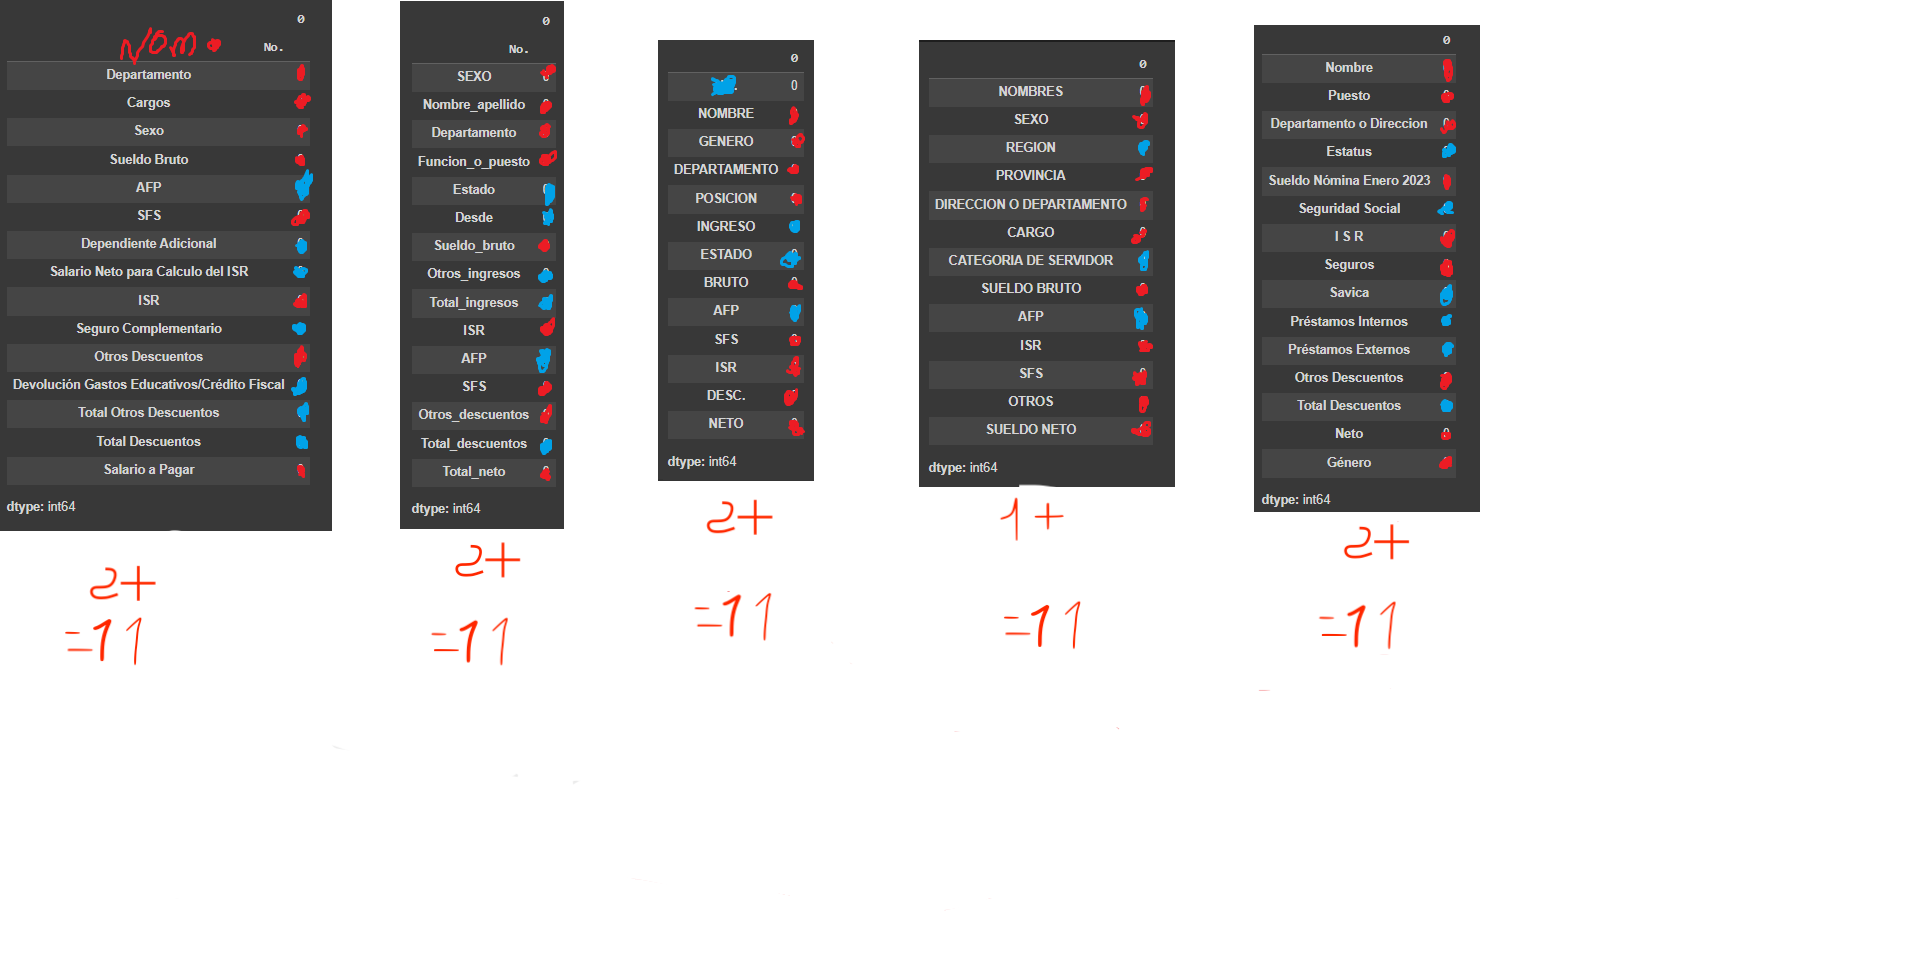

In [ ]:
from IPython.display import Image

# Mostrar imagen cargada en Colab
Image('/content/Estandar de columnas.png')

In [ ]:
# Crear diccionarios para estandarizar los ordenes de cada columna, y luego concatenar.
# Nombre
# Sexo
# Departamento
# Cargo
# Institución
# Sueldo bruto
# ISR
# SEGURO
# Otros descuentos
# Sueldo neto
# Provincia


# GUIA EN ORDEN: UAF, UASD, OPRET, SNS, MIVED

# df_uaf.columns
uaf_dict = {
    "nombre": ["anonimo"]*len(df_uaf), # anonimas celdas, la cantidad de filas que hay.,
    "sexo": df_uaf["sexo"],
    "departamento": df_uaf["departamento"],
    "cargo": df_uaf["cargos"],
    "institucion": ["UAF"]*len(df_uaf),
    "sueldo bruto": df_uaf["sueldo bruto "],
    "isr": df_uaf["isr"],
    "seguro": df_uaf["sfs"],
    "otros descuentos": df_uaf["otros descuentos "],
    "sueldo neto": df_uaf["salario a pagar"],
    "provincia": ["no listada"]*len(df_uaf)
}


# df_uasd.columns
uasd_dict ={
    "nombre": df_uasd["nombre_apellido"],
    "sexo": df_uasd["sexo"],
    "departamento": df_uasd["departamento"],
    "cargo": df_uasd["funcion_o_puesto"],
    "institucion": ["UASD"]*len(df_uasd),
    "sueldo bruto": df_uasd["sueldo_bruto"],
    "isr": df_uasd["isr"],
    "seguro": df_uasd["sfs"],
    "otros descuentos": df_uasd["otros_descuentos"],
    "sueldo neto": df_uasd["total_neto"],
    "provincia": ["no listada"]*len(df_uasd)
}

# opret_new_df.columns
opret_dict = {
    "nombre": opret_new_df["nombre"],
    "sexo": opret_new_df["genero"],
    "departamento": opret_new_df["departamento"],
    "cargo": opret_new_df["posicion"],
    "institucion": ["OPRET"]*len(opret_new_df),
    "sueldo bruto": opret_new_df["bruto"],
    "isr": opret_new_df["isr"],
    "seguro": opret_new_df["sfs"],
    "otros descuentos": opret_new_df["desc."],
    "sueldo neto": opret_new_df["neto"],
    "provincia": ["no listada"]*len(opret_new_df)
}

# df_sns.columns
sns_dict = {
    "nombre": df_sns["nombres"],
    "sexo": df_sns["sexo"],
    "departamento": df_sns["direccion o departamento"],
    "cargo": df_sns["cargo"],
    "institucion": ["SNS"]*len(df_sns),
    "sueldo bruto": df_sns["sueldo bruto"],
    "isr": df_sns["isr"],
    "seguro": df_sns["sfs"],
    "otros descuentos": df_sns["otros"], # otros descuentos
    "sueldo neto": df_sns["sueldo neto"],
    "provincia": df_sns["provincia"]
}

# df_mv.columns
mived_dict = {
    "nombre": df_mv["nombre"],
    "sexo": df_mv["género"],
    "departamento": df_mv["departamento o direccion"],
    "cargo": df_mv["puesto"],
    "institucion": ["MIVED"]*len(df_mv),
    "sueldo bruto": df_mv["sueldo nómina enero 2023"],
    "isr": df_mv["i s r"],
    "seguro": df_mv["seguros"],
    "otros descuentos": df_mv["otros descuentos"],
    "sueldo neto": df_mv["neto"],
    "provincia": ["no listada"]*len(df_mv)
}

In [ ]:
df_mv.columns

Index(['nombre', 'puesto', 'departamento o direccion', 'estatus',
       'sueldo nómina enero 2023', 'seguridad social', 'i s r', 'seguros',
       'savica', 'préstamos internos', 'préstamos externos',
       'otros descuentos', 'total descuentos', 'neto', 'género'],
      dtype='object')

In [ ]:
list(uaf_dict.keys()) == list(uasd_dict.keys())

True

In [ ]:
list(uasd_dict.keys()) == list(opret_dict.keys())

True

In [ ]:
list(opret_dict.keys()) == list(sns_dict.keys())


True

In [ ]:
list(sns_dict.keys()) == list(mived_dict.keys())

True

In [ ]:
list(mived_dict.keys())

['nombre',
 'sexo',
 'departamento',
 'cargo',
 'institucion',
 'sueldo bruto',
 'isr',
 'seguro',
 'otros descuentos',
 'sueldo neto',
 'provincia']

In [ ]:
list(sns_dict.keys())

['nombre',
 'sexo',
 'departamento',
 'cargo',
 'institucion',
 'sueldo bruto',
 'isr',
 'seguro',
 'otros descuentos',
 'sueldo neto',
 'provincia']

In [ ]:
# Son todos los nombres de las columnas lo mismo?
list(uaf_dict.keys()) == list(uasd_dict.keys()) == list(mived_dict.keys()) == list(sns_dict.keys()) == list(opret_dict.keys())

True

In [ ]:
# Concatenar todos los datos, y luego darle un formato de tipo de dato adecuado.
df_concatenados = pd.concat([
    pd.DataFrame(uaf_dict),
    pd.DataFrame(uasd_dict),
    pd.DataFrame(opret_dict),
    pd.DataFrame(sns_dict),
    pd.DataFrame(mived_dict)
])

df_concatenados


,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
1,anonimo,F,Dirección General,Directora General,UAF,285000,56552.04,4943.8,25,215299.66,no listada
2,anonimo,F,Dpto. de Coordinación del Despacho,Asistente del Despacho,UAF,60000,3486.68,1824,25,52942.32,no listada
3,anonimo,F,Departamento de Comunicaciones,Diseñador Gráfico,UAF,43000,412.32,1307.2,25,36996.48,no listada
4,anonimo,F,Departamento de Comunicaciones,Recepcionista,UAF,40000,442.65,1216,25,37168.35,no listada
5,anonimo,F,Oficina de Acceso a la Información,Técnico de OAI,UAF,48000,1571.73,1459.2,25,43566.47,no listada
...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,FEMENINO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,AUXILIAR ALMACEN Y SUMINISTRO,MIVED,27000,0.0,0.0,0,25379.3,no listada
1107,EUDALYS GARCIA PEREZ,FEMENINO,DEPARTAMENTO DE SERVICIOS GENERALES,SUPERVISOR (A) MAYORDOMIA,MIVED,20000,0.0,0.0,0,18793,no listada
1108,ESTARLIN JAVIER TAVERAS CABRERA,MASCULINO,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000,0.0,0.0,0,23497.5,no listada
1109,FRANCISCO CUELLO RAMIREZ,MASCULINO,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000,0.0,0.0,0,23497.5,no listada


In [ ]:
# Ver información de el dataframe
df_concatenados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85283 entries, 1 to 1110
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nombre            85283 non-null  object
 1   sexo              85283 non-null  object
 2   departamento      85283 non-null  object
 3   cargo             85283 non-null  object
 4   institucion       85283 non-null  object
 5   sueldo bruto      85283 non-null  object
 6   isr               85283 non-null  object
 7   seguro            85283 non-null  object
 8   otros descuentos  85283 non-null  object
 9   sueldo neto       85283 non-null  object
 10  provincia         85283 non-null  object
dtypes: object(11)
memory usage: 9.8+ MB


In [ ]:
# Describir los DFs concatenados
df_concatenados.describe()

,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
count,85283,85283,85283,85283,85283,85283,85283.0,85283.00,85283,85283,85283
unique,83761,4,2638,2060,5,6209,4008.0,3916.00,38672,47834,33
top,anonimo,F,No Asignado,AUXILIAR DE ENFERMERIA,SNS,10000,0.0,1016.03,25,9384,DISTRITO NACIONAL
freq,34,62583,2326,14981,78570,9451,42088.0,14140.00,20663,5434,17089


In [ ]:
# Verificar si hay valores faltantes
df_concatenados.isna().sum()

,0
nombre,0
sexo,0
departamento,0
cargo,0
institucion,0
sueldo bruto,0
isr,0
seguro,0
otros descuentos,0
sueldo neto,0


### Notamos que los datos que estan supuestos a ser numericos, son objetos.

Debemos hacer algo para que los valores que son numericos, se perciban como tal

In [ ]:
df_concatenados.dtypes

,0
nombre,object
sexo,object
departamento,object
cargo,object
institucion,object
sueldo bruto,object
isr,object
seguro,object
otros descuentos,object
sueldo neto,object


In [ ]:
# Dar formato ideal a los datos que representan un formato determinado.
# Sueldo bruto, isr, seguro, otros descuentos, sueldo neto


df_concatenados["sueldo bruto"] = df_concatenados["sueldo bruto"].astype(float) # Obtenemos un error
df_concatenados["sueldo bruto"] = df_concatenados["sueldo bruto"].astype(float)
df_concatenados["sueldo neto"] = df_concatenados["sueldo neto"].astype(float)
df_concatenados["isr"] = df_concatenados["isr"].astype(float)
df_concatenados["seguro"] = df_concatenados["seguro"].astype(float)
df_concatenados["otros descuentos"] = df_concatenados["otros descuentos"].astype(float)

df_concatenados

,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
1,anonimo,F,Dirección General,Directora General,UAF,285000.0,56552.04,4943.8,25.0,215299.66,no listada
2,anonimo,F,Dpto. de Coordinación del Despacho,Asistente del Despacho,UAF,60000.0,3486.68,1824.0,25.0,52942.32,no listada
3,anonimo,F,Departamento de Comunicaciones,Diseñador Gráfico,UAF,43000.0,412.32,1307.2,25.0,36996.48,no listada
4,anonimo,F,Departamento de Comunicaciones,Recepcionista,UAF,40000.0,442.65,1216.0,25.0,37168.35,no listada
5,anonimo,F,Oficina de Acceso a la Información,Técnico de OAI,UAF,48000.0,1571.73,1459.2,25.0,43566.47,no listada
...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,FEMENINO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,AUXILIAR ALMACEN Y SUMINISTRO,MIVED,27000.0,0.00,0.0,0.0,25379.30,no listada
1107,EUDALYS GARCIA PEREZ,FEMENINO,DEPARTAMENTO DE SERVICIOS GENERALES,SUPERVISOR (A) MAYORDOMIA,MIVED,20000.0,0.00,0.0,0.0,18793.00,no listada
1108,ESTARLIN JAVIER TAVERAS CABRERA,MASCULINO,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada
1109,FRANCISCO CUELLO RAMIREZ,MASCULINO,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada


In [ ]:
"""import datetime

# Verificar si hay algún valor de tipo datetime en la columna "sueldo bruto"
if df_concatenados["sueldo bruto"].apply(lambda x: isinstance(x, datetime.datetime)).any():
    print("Sí hay valores de tipo fecha")

else:
    print("No hay valores de tipo fecha")"""


'import datetime\n\n# Verificar si hay algún valor de tipo datetime en la columna "sueldo bruto"\nif df_concatenados["sueldo bruto"].apply(lambda x: isinstance(x, datetime.datetime)).any():\n    print("Sí hay valores de tipo fecha")\n\nelse:\n    print("No hay valores de tipo fecha")'

In [ ]:
"""import datetime

# Eliminar las filas donde los valores de "sueldo bruto" son de tipo datetime
# isinstance, retorna true si el valor especificado es de tipo que se especifica, y false en caso contrario
df_concatenados = df_concatenados.loc[~df_concatenados["sueldo bruto"].apply(lambda x: isinstance(x, datetime.datetime))]

# Verificar si se eliminaron correctamente
df_concatenados
"""

'import datetime\n\n# Eliminar las filas donde los valores de "sueldo bruto" son de tipo datetime\n# isinstance, retorna true si el valor especificado es de tipo que se especifica, y false en caso contrario\ndf_concatenados = df_concatenados.loc[~df_concatenados["sueldo bruto"].apply(lambda x: isinstance(x, datetime.datetime))]\n\n# Verificar si se eliminaron correctamente\ndf_concatenados\n'

In [ ]:
df_concatenados

,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
1,anonimo,F,Dirección General,Directora General,UAF,285000.0,56552.04,4943.8,25.0,215299.66,no listada
2,anonimo,F,Dpto. de Coordinación del Despacho,Asistente del Despacho,UAF,60000.0,3486.68,1824.0,25.0,52942.32,no listada
3,anonimo,F,Departamento de Comunicaciones,Diseñador Gráfico,UAF,43000.0,412.32,1307.2,25.0,36996.48,no listada
4,anonimo,F,Departamento de Comunicaciones,Recepcionista,UAF,40000.0,442.65,1216.0,25.0,37168.35,no listada
5,anonimo,F,Oficina de Acceso a la Información,Técnico de OAI,UAF,48000.0,1571.73,1459.2,25.0,43566.47,no listada
...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,FEMENINO,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,AUXILIAR ALMACEN Y SUMINISTRO,MIVED,27000.0,0.00,0.0,0.0,25379.30,no listada
1107,EUDALYS GARCIA PEREZ,FEMENINO,DEPARTAMENTO DE SERVICIOS GENERALES,SUPERVISOR (A) MAYORDOMIA,MIVED,20000.0,0.00,0.0,0.0,18793.00,no listada
1108,ESTARLIN JAVIER TAVERAS CABRERA,MASCULINO,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada
1109,FRANCISCO CUELLO RAMIREZ,MASCULINO,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada


In [ ]:
df_concatenados.dtypes

,0
nombre,object
sexo,object
departamento,object
cargo,object
institucion,object
sueldo bruto,float64
isr,float64
seguro,float64
otros descuentos,float64
sueldo neto,float64


In [ ]:
# Viendo las variables de sexo
df_concatenados["sexo"]

,sexo
1,F
2,F
3,F
4,F
5,F
...,...
1106,FEMENINO
1107,FEMENINO
1108,MASCULINO
1109,MASCULINO


In [ ]:
# Aplicar lambda a los valores de sexo para estandarizar todas las variables
df_concatenados["sexo"] = df_concatenados["sexo"].apply(lambda x: "F" if x in ["FEMENINO", "F"] else "M")

# Mostrar el dataframe actualizado
df_concatenados

,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
1,anonimo,F,Dirección General,Directora General,UAF,285000.0,56552.04,4943.8,25.0,215299.66,no listada
2,anonimo,F,Dpto. de Coordinación del Despacho,Asistente del Despacho,UAF,60000.0,3486.68,1824.0,25.0,52942.32,no listada
3,anonimo,F,Departamento de Comunicaciones,Diseñador Gráfico,UAF,43000.0,412.32,1307.2,25.0,36996.48,no listada
4,anonimo,F,Departamento de Comunicaciones,Recepcionista,UAF,40000.0,442.65,1216.0,25.0,37168.35,no listada
5,anonimo,F,Oficina de Acceso a la Información,Técnico de OAI,UAF,48000.0,1571.73,1459.2,25.0,43566.47,no listada
...,...,...,...,...,...,...,...,...,...,...,...
1106,CRUCELINA FLORES MERCEDES,F,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,AUXILIAR ALMACEN Y SUMINISTRO,MIVED,27000.0,0.00,0.0,0.0,25379.30,no listada
1107,EUDALYS GARCIA PEREZ,F,DEPARTAMENTO DE SERVICIOS GENERALES,SUPERVISOR (A) MAYORDOMIA,MIVED,20000.0,0.00,0.0,0.0,18793.00,no listada
1108,ESTARLIN JAVIER TAVERAS CABRERA,M,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada
1109,FRANCISCO CUELLO RAMIREZ,M,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada


In [ ]:
# Con esto comprobamos que vamos bien
print("De {} filas que tiene la tabla, {} celdas de la columna sexo son o M o F.".format(len(df_concatenados),
                                                                                          len(df_concatenados["sexo"].isin(["F", "M"]))))


De 85283 filas que tiene la tabla, 85283 celdas de la columna sexo son o M o F.


In [ ]:
df_concatenados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85283 entries, 1 to 1110
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            85283 non-null  object 
 1   sexo              85283 non-null  object 
 2   departamento      85283 non-null  object 
 3   cargo             85283 non-null  object 
 4   institucion       85283 non-null  object 
 5   sueldo bruto      85283 non-null  float64
 6   isr               85283 non-null  float64
 7   seguro            85283 non-null  float64
 8   otros descuentos  85283 non-null  float64
 9   sueldo neto       85283 non-null  float64
 10  provincia         85283 non-null  object 
dtypes: float64(5), object(6)
memory usage: 9.8+ MB


In [ ]:
df_concatenados.describe()

,sueldo bruto,isr,seguro,otros descuentos,sueldo neto
count,85283.000000,85283.000000,85283.000000,85283.000000,85283.000000
mean,40114.215693,1874.971978,1089.566648,10078.755432,26337.314996
std,24148.079967,3086.858520,698.670333,14003.868075,20480.248849
min,3150.000000,-40768.490000,-4943.800000,-9928.700000,0.990000
25%,18000.000000,0.000000,501.665000,25.000000,9384.000000
50%,38196.610000,189.520000,1016.030000,3302.450000,21507.160000
75%,55000.000000,2564.910000,1427.460000,15970.390000,39528.920000
max,300000.000000,60194.490000,13694.420000,138571.520000,226126.710000


In [ ]:
df_concatenados.isna().sum()

,0
nombre,0
sexo,0
departamento,0
cargo,0
institucion,0
sueldo bruto,0
isr,0
seguro,0
otros descuentos,0
sueldo neto,0


In [ ]:
df_concatenados.head()

,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
1,anonimo,F,Dirección General,Directora General,UAF,285000.0,56552.04,4943.8,25.0,215299.66,no listada
2,anonimo,F,Dpto. de Coordinación del Despacho,Asistente del Despacho,UAF,60000.0,3486.68,1824.0,25.0,52942.32,no listada
3,anonimo,F,Departamento de Comunicaciones,Diseñador Gráfico,UAF,43000.0,412.32,1307.2,25.0,36996.48,no listada
4,anonimo,F,Departamento de Comunicaciones,Recepcionista,UAF,40000.0,442.65,1216.0,25.0,37168.35,no listada
5,anonimo,F,Oficina de Acceso a la Información,Técnico de OAI,UAF,48000.0,1571.73,1459.2,25.0,43566.47,no listada


In [ ]:
df_concatenados.tail()

,nombre,sexo,departamento,cargo,institucion,sueldo bruto,isr,seguro,otros descuentos,sueldo neto,provincia
1106,CRUCELINA FLORES MERCEDES,F,DEPARTAMENTO DE ALMACEN Y SUMINISTRO,AUXILIAR ALMACEN Y SUMINISTRO,MIVED,27000.0,0.00,0.0,0.0,25379.30,no listada
1107,EUDALYS GARCIA PEREZ,F,DEPARTAMENTO DE SERVICIOS GENERALES,SUPERVISOR (A) MAYORDOMIA,MIVED,20000.0,0.00,0.0,0.0,18793.00,no listada
1108,ESTARLIN JAVIER TAVERAS CABRERA,M,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada
1109,FRANCISCO CUELLO RAMIREZ,M,DEPARTAMENTO DE SERVICIOS GENERALES,CHOFER II,MIVED,25000.0,0.00,0.0,0.0,23497.50,no listada
1110,JADE NICOLE SOSA MEJIA,F,MINISTERIO DE LA VIVIENDA HABITAT Y EDIF,ASISTENTE,MIVED,55000.0,2559.68,0.0,0.0,49164.82,no listada


### Diccionario del conjunto de datos concatenado

Este es un pequeño diccionario que describe las variables del conjunto de datos concatenado. Su propósito es desglosar cada variable, indicando su tipo de dato y la cantidad de valores diferentes.

1. **nombre**
   - `Cualitativa`
   - Hace referencia al nombre de cada individuo. Las celdas que no contengan un nombre serán clasificadas como "Anónimo".

2. **sexo**
   - `Cualitativa`
   - Indica el género del individuo.
     - "F": Femenino.
     - "M": Masculino.

3. **departamento**
   - `Cualitativa`
   - Denota el área en la que el individuo se desempeña.

4. **cargo**
   - `Cualitativa`
   - Representa la posición que ocupa el individuo dentro de la institución. Esta variable suele estar correlacionada con el departamento.

5. **institución**
   - `Cualitativa`
   - Indica el nombre de la institución donde trabaja el individuo. Esto permite realizar análisis como:
     - Cantidad de individuos por institución.
     - Instituciones con mayores salarios o rankings entre ellas.

6. **sueldo bruto**
   - `Cuantitativa`
   - Es el sueldo al que tiene derecho el individuo antes de aplicar descuentos, es decir, sin el cálculo de ISR, seguro, etc.

7. **ISR**
   - `Cuantitativa`
   - Refleja el impuesto sobre la renta (ISR) que paga el individuo.

8. **seguro**
   - `Cuantitativa`
   - Indica el descuento correspondiente al seguro del individuo.

9. **otros descuentos**
   - `Cuantitativa`
   - Denota cualquier otro tipo de descuento adicional aplicado al individuo.

10. **sueldo neto**
    - `Cuantitativa`
    - Indica el sueldo del individuo después de aplicar todos los descuentos.

11. **provincia**
    - `Cualitativa`
    - Denota la provincia en la que reside el individuo. Si la provincia no está determinada, se clasificará como "No asignada".

In [ ]:
df_concatenados.columns

Index(['nombre', 'sexo', 'departamento', 'cargo', 'institucion',
       'sueldo bruto', 'isr', 'seguro', 'otros descuentos', 'sueldo neto',
       'provincia'],
      dtype='object')

In [ ]:
'nombre',
'sexo',
'departamento',
'cargo',
'institucion',
'sueldo bruto',
'isr',
'seguro',
'otros descuentos',
'sueldo neto',
'provincia'

'provincia'

In [ ]:
df_concatenados.describe()

,sueldo bruto,isr,seguro,otros descuentos,sueldo neto
count,85283.000000,85283.000000,85283.000000,85283.000000,85283.000000
mean,40114.215693,1874.971978,1089.566648,10078.755432,26337.314996
std,24148.079967,3086.858520,698.670333,14003.868075,20480.248849
min,3150.000000,-40768.490000,-4943.800000,-9928.700000,0.990000
25%,18000.000000,0.000000,501.665000,25.000000,9384.000000
50%,38196.610000,189.520000,1016.030000,3302.450000,21507.160000
75%,55000.000000,2564.910000,1427.460000,15970.390000,39528.920000
max,300000.000000,60194.490000,13694.420000,138571.520000,226126.710000


In [ ]:
df_concatenados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85283 entries, 1 to 1110
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            85283 non-null  object 
 1   sexo              85283 non-null  object 
 2   departamento      85283 non-null  object 
 3   cargo             85283 non-null  object 
 4   institucion       85283 non-null  object 
 5   sueldo bruto      85283 non-null  float64
 6   isr               85283 non-null  float64
 7   seguro            85283 non-null  float64
 8   otros descuentos  85283 non-null  float64
 9   sueldo neto       85283 non-null  float64
 10  provincia         85283 non-null  object 
dtypes: float64(5), object(6)
memory usage: 9.8+ MB


In [ ]:
df_concatenados["sueldo bruto"]

,sueldo bruto
1,285000.0
2,60000.0
3,43000.0
4,40000.0
5,48000.0
...,...
1106,27000.0
1107,20000.0
1108,25000.0
1109,25000.0


In [ ]:
df_concatenados["sueldo bruto"].max()

300000.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

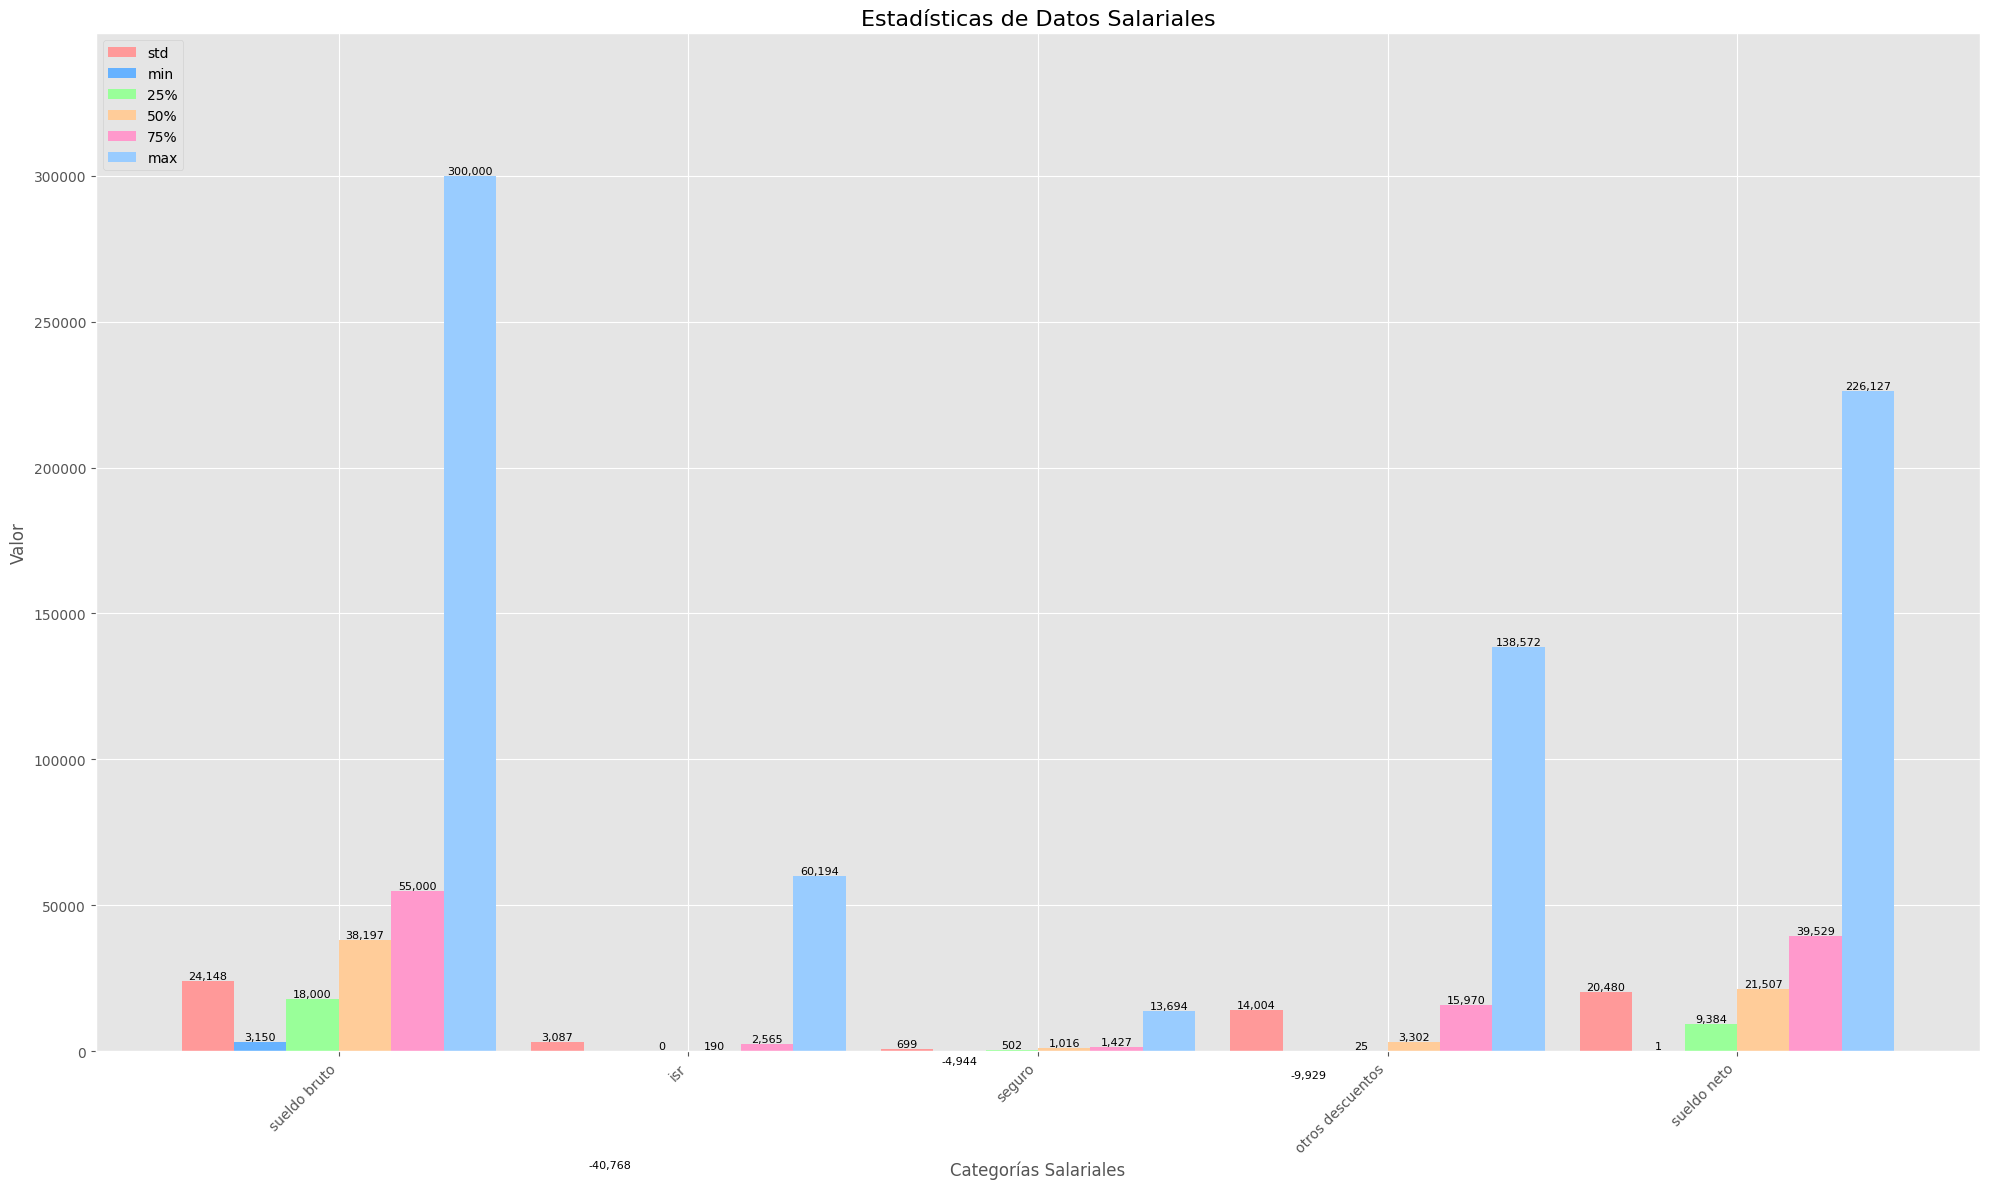

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def grafico_estadisticas(df):

    estadisticas = ['std', 'min', '25%', '50%', '75%', 'max']


    stats = df.describe().loc[estadisticas]


    fig, ax = plt.subplots(figsize=(20, 12))


    colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']


    bar_width = 0.15
    index = range(len(stats.columns))

    for i, stat in enumerate(estadisticas):
        bars = ax.bar([x + i*bar_width for x in index], stats.loc[stat], bar_width, label=stat, color=colores[i])


        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:,.0f}',
                    ha='center', va='bottom', fontsize=8, rotation=0)

    ax.set_xlabel('Categorías Salariales', fontsize=12)
    ax.set_ylabel('Valor', fontsize=12)
    ax.set_title('Estadísticas de Datos Salariales', fontsize=16)


    ax.set_xticks([x + bar_width*2.5 for x in index])
    ax.set_xticklabels(stats.columns, rotation=45, ha='right', fontsize=10)


    ax.legend(fontsize=10, loc='upper left')


    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)


    plt.tight_layout()
    plt.show()


grafico_estadisticas(df_concatenados)

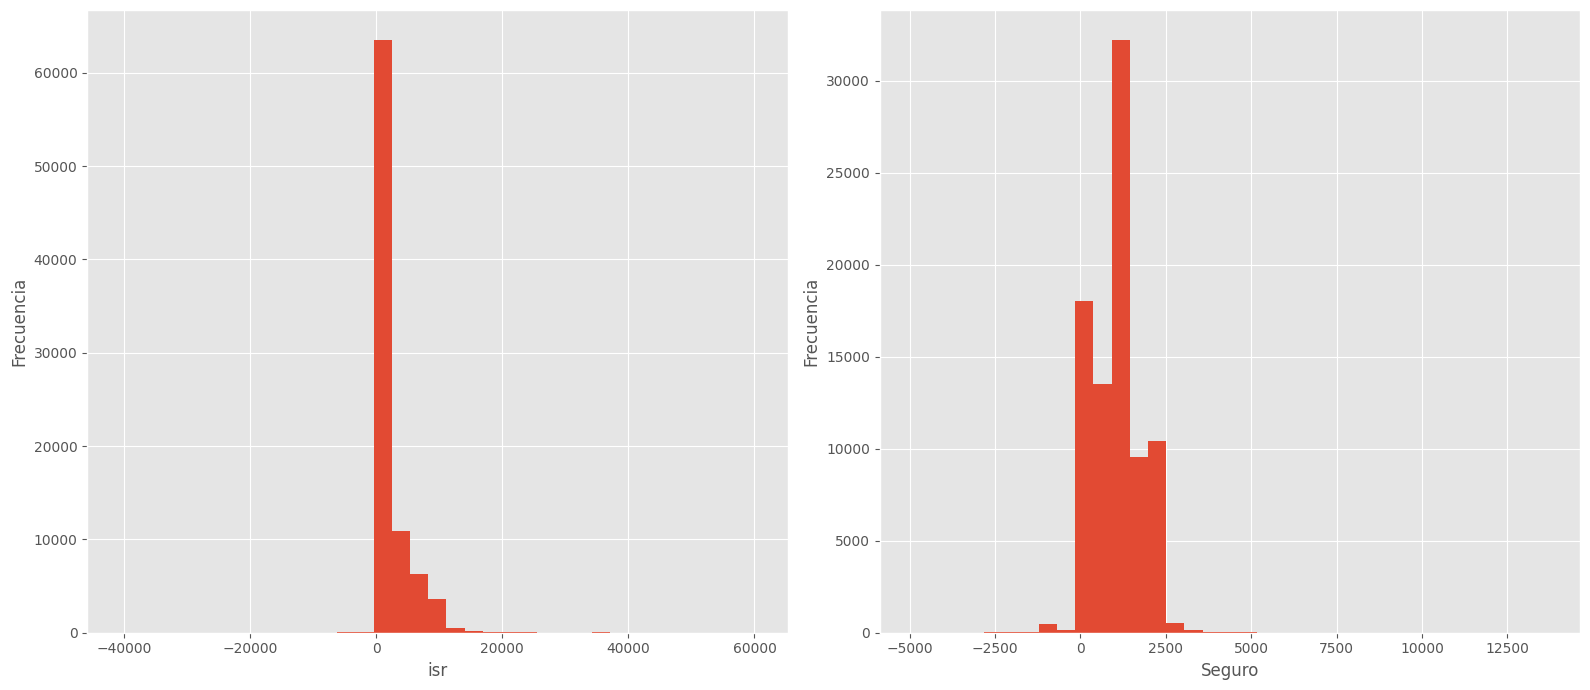

In [ ]:
# Distribución más detallada, con nombres de ejes únicos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

ax1.hist(df_concatenados["isr"], bins=35)
ax1.set_xlabel('isr')
ax1.set_ylabel('Frecuencia')



ax2.hist(df_concatenados["seguro"], bins=35)
ax2.set_xlabel('Seguro')
ax2.set_ylabel('Frecuencia')


plt.tight_layout()
plt.show()

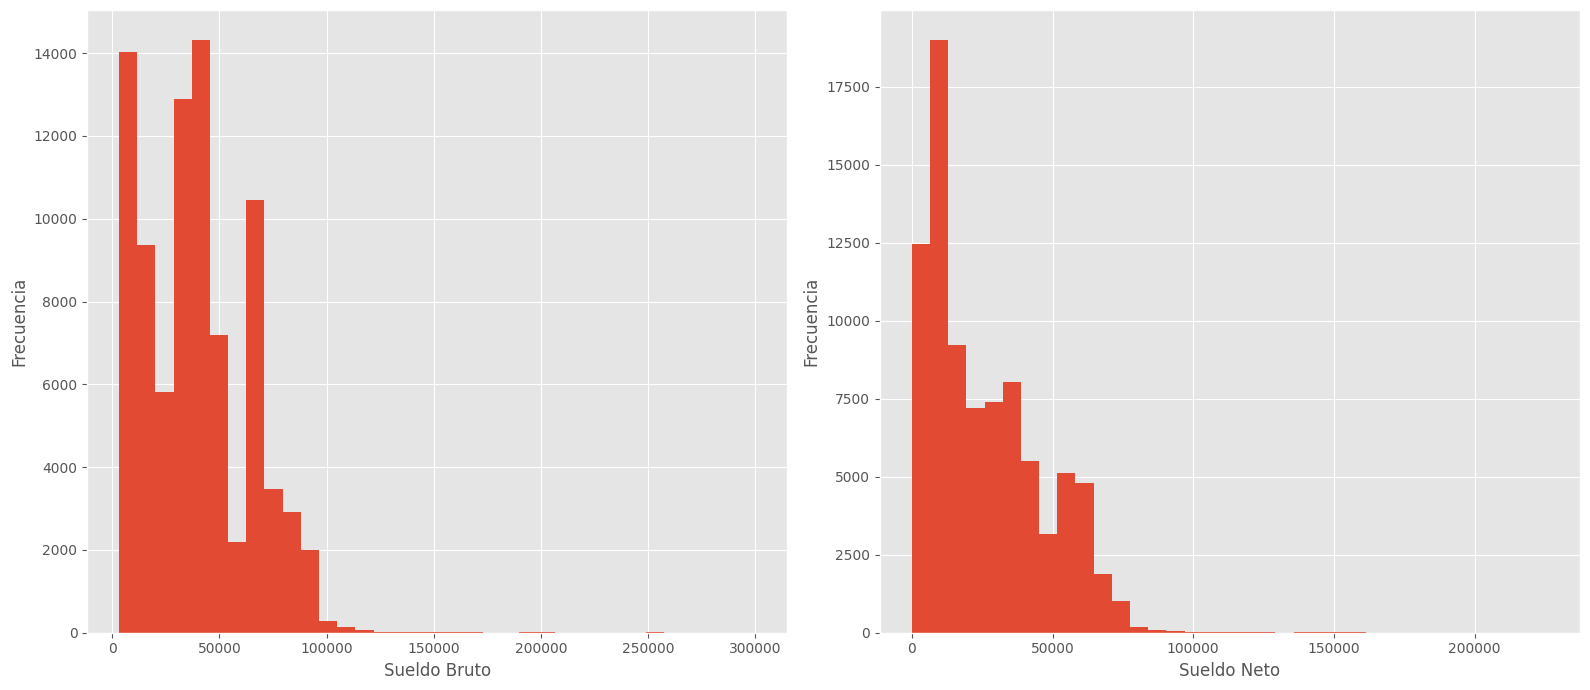

In [ ]:
fig11, (ax11, ax22) = plt.subplots(1, 2, figsize=(16, 7))

ax11.hist(df_concatenados["sueldo bruto"], bins=35)
ax11.set_xlabel('Sueldo Bruto')
ax11.set_ylabel('Frecuencia')



ax22.hist(df_concatenados["sueldo neto"], bins=35)
ax22.set_xlabel('Sueldo Neto')
ax22.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Utilizar cross tab

pd.crosstab(df_concatenados["sexo"], df_concatenados["institucion"])

institucion,MIVED,OPRET,SNS,UAF,UASD
sexo,,,,,
F,441,391,60018,17,2157
M,662,346,18552,17,2682


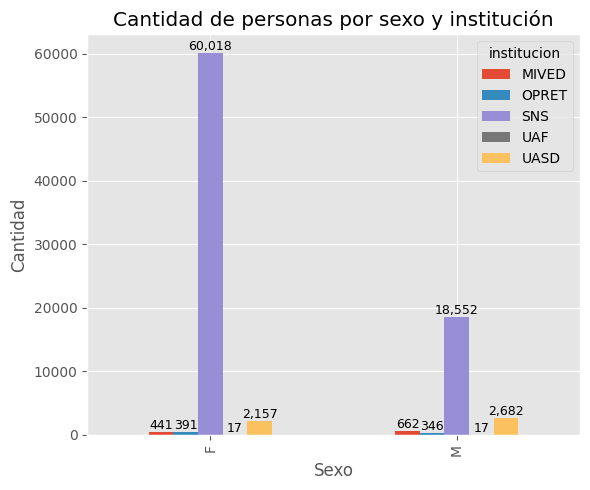

In [ ]:
fig, ax =  plt.subplots(figsize=(6,5), ncols=1, nrows=1)


#ax.bar(pd.crosstab(df_concatenados["sexo"], df_concatenados["institucion"]))
barras= pd.crosstab(df_concatenados["sexo"], df_concatenados["institucion"]).plot(kind="bar", ax=ax)

for barra in barras.patches: # Patches nos permite acceder a las propiedades de cada barra en si.
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., height,
            f'{height:,.0f}',
            ha='center', va='bottom', fontsize=9)

ax.set(
    title="Cantidad de personas por sexo y institución",
    xlabel="Sexo",
    ylabel="Cantidad"
)
plt.tight_layout()
plt.show()

In [ ]:
# Demasiados cargos diferentes para graficar en una pantalla...

len(df_concatenados["cargo"].unique())

2060

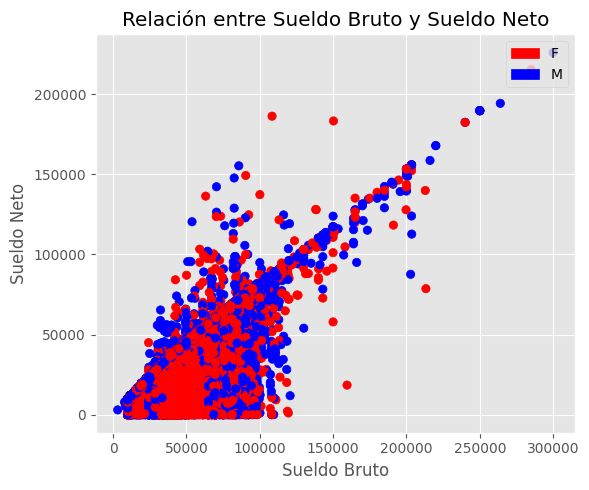

In [ ]:
fig, ax =  plt.subplots(figsize=(6,5), ncols=1, nrows=1)
import matplotlib.patches as mpatches


sc = ax.scatter(
    df_concatenados["sueldo bruto"], df_concatenados["sueldo neto"], c=df_concatenados["sexo"].map(
        {"F": "red", "M": "blue"}),
    )

# Crear manualmente los handles para la leyenda
f_patch = mpatches.Patch(color='red', label='F')
m_patch = mpatches.Patch(color='blue', label='M')

# Añadir las leyendas personalizadas
ax.legend(handles=[f_patch, m_patch], loc="upper right")

# Seteando título
ax.set_title('Relación entre Sueldo Bruto y Sueldo Neto')
ax.set_xlabel('Sueldo Bruto')
ax.set_ylabel('Sueldo Neto')


# Permitiendo que se vean los puntos, sin que nada obstruya
plt.tight_layout()

plt.show()

In [ ]:
df_concatenados[df_concatenados["institucion"] == "SNS"]["sexo"].value_counts(normalize=True)

,proportion
sexo,
F,0.763879
M,0.236121


In [ ]:
len(df_concatenados[(df_concatenados["institucion"] == "SNS") * (df_concatenados["sexo"] == "F")]) / len(df_concatenados[df_concatenados["institucion"] == "SNS"])

0.7638793432607865

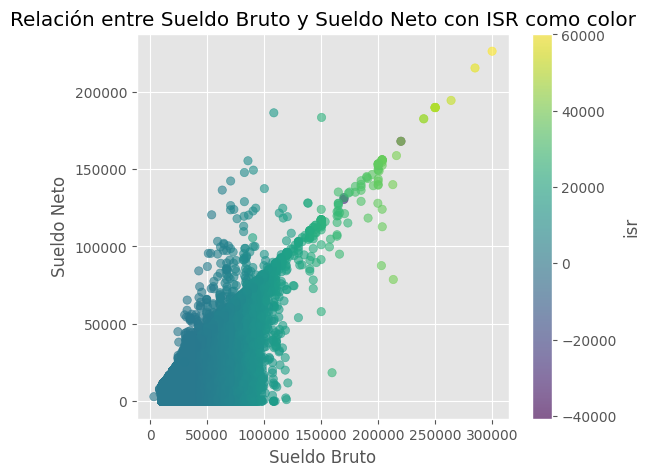

In [ ]:
  # Variable de colores basada en ISR
fig, ax = plt.subplots(figsize=(6, 5), ncols=1, nrows=1)

sc = ax.scatter(df_concatenados['sueldo bruto'], df_concatenados['sueldo neto'],
                 c=df_concatenados['isr'], cmap='viridis', alpha=0.6)

# Etiquetas de los ejes
plt.xlabel('Sueldo Bruto')
plt.ylabel('Sueldo Neto')
plt.title('Relación entre Sueldo Bruto y Sueldo Neto con ISR como color')


# Añadir barra de color (cbar) con una leyenda
cbar = plt.colorbar(sc)
cbar.set_label('isr')

plt.show()



### A medida que el sueldo bruto sube, tambien sube el isr.


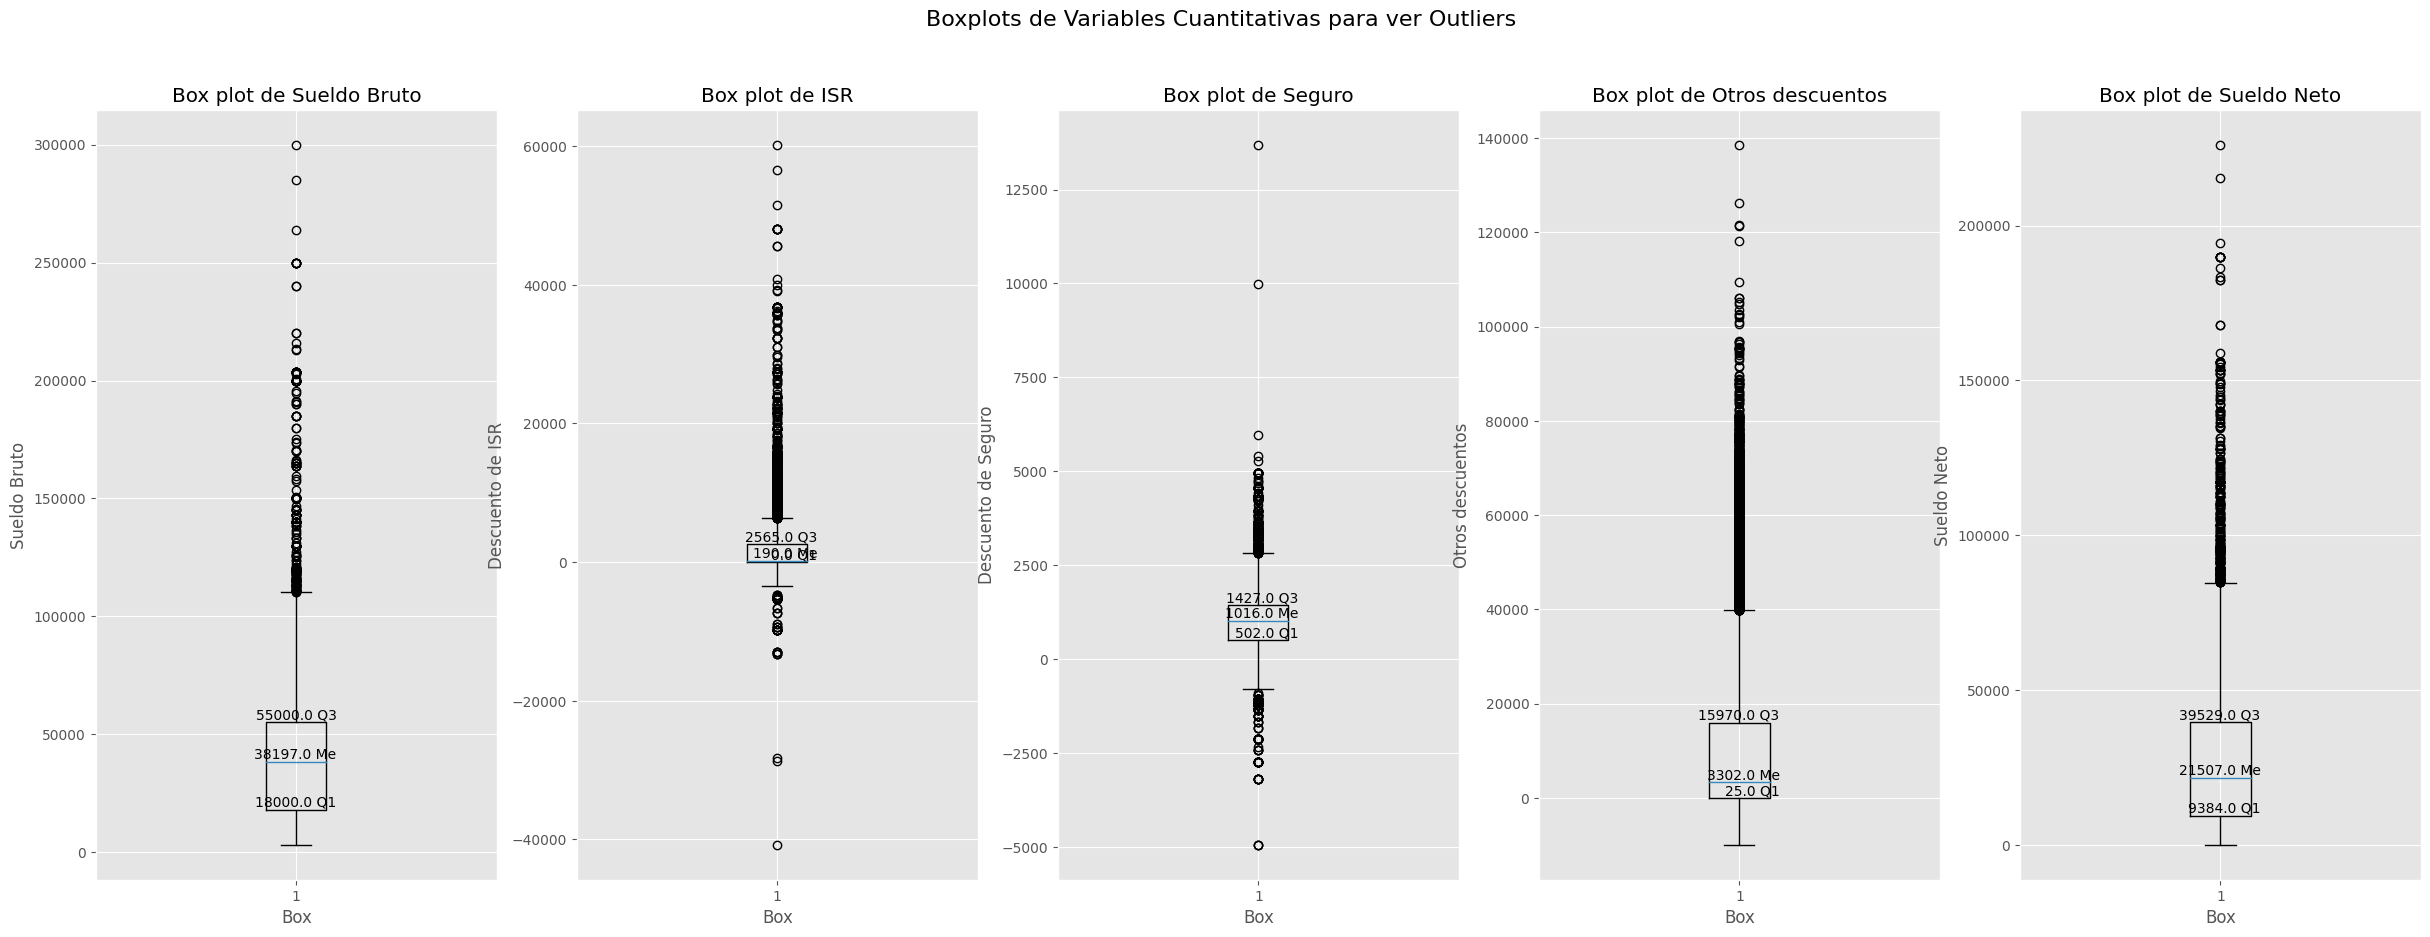

In [ ]:
## Haciendo varios boxplots

# Cantidad de variables cuantitativas:
    # Sueldo bruto
    # ISR
    # SEGURO
    # Otros descuentos
    # Sueldo neto


# Crea 5 axis
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(30, 10))

fig.suptitle('Boxplots de Variables Cuantitativas para ver Outliers', fontsize=16) #

box_sueldo = ax1.boxplot(df_concatenados["sueldo bruto"])

# Datos de box1
box_sueldo_mediana = np.round(df_concatenados["sueldo bruto"].median())
box_sueldo_q1 = np.round(df_concatenados["sueldo bruto"].quantile(0.25))
box_sueldo_q3 = np.round(df_concatenados["sueldo bruto"].quantile(0.75))

ax1.text(x=1.1, y=box_sueldo_mediana, s=f"{box_sueldo_mediana} Me", ha="right", va="bottom")
ax1.text(x=1.1, y=box_sueldo_q1, s=f"{box_sueldo_q1} Q1", ha="right", va="bottom")
ax1.text(x=1.1, y=box_sueldo_q3, s=f"{box_sueldo_q3} Q3", ha="right", va="bottom")
ax1.set(
  title="Box plot de Sueldo Bruto",
  xlabel="Box",
  ylabel="Sueldo Bruto"
)

box_isr = ax2.boxplot(df_concatenados["isr"])

# Datos de box2
box_isr_mediana = np.round(df_concatenados["isr"].median())
box_isr_q1 = np.round(df_concatenados["isr"].quantile(0.25))
box_isr_q3 = np.round(df_concatenados["isr"].quantile(0.75))


ax2.text(x=1.1, y=box_isr_mediana, s=f"{box_isr_mediana} Me", ha="right", va="bottom")
ax2.text(x=1.1, y=box_isr_q1, s=f"{box_isr_q1} Q1", ha="right", va="bottom")
ax2.text(x=1.1, y=box_isr_q3, s=f"{box_isr_q3} Q3", ha="right", va="bottom")
ax2.set(
  title="Box plot de ISR",
  xlabel="Box",
  ylabel="Descuento de ISR"
)

box_seguro = ax3.boxplot(df_concatenados["seguro"])

# Datos de box3
box_seguro_mediana = np.round(df_concatenados["seguro"].median())
box_seguro_q1 = np.round(df_concatenados["seguro"].quantile(0.25))
box_seguro_q3 = np.round(df_concatenados["seguro"].quantile(0.75))

ax3.text(x=1.1, y=box_seguro_mediana, s=f"{box_seguro_mediana} Me", ha="right", va="bottom")
ax3.text(x=1.1, y=box_seguro_q1, s=f"{box_seguro_q1} Q1", ha="right", va="bottom")
ax3.text(x=1.1, y=box_seguro_q3, s=f"{box_seguro_q3} Q3", ha="right", va="bottom")
ax3.set(
  title="Box plot de Seguro",
  xlabel="Box",
  ylabel="Descuento de Seguro"
)

# Mostrando el plot
box_otros = ax4.boxplot(df_concatenados["otros descuentos"])

# Datos de box4
box_otros_mediana = np.round(df_concatenados["otros descuentos"].median())
box_otros_q1 = np.round(df_concatenados["otros descuentos"].quantile(0.25))
box_otros_q3 = np.round(df_concatenados["otros descuentos"].quantile(0.75))

ax4.text(x=1.1, y=box_otros_mediana, s=f"{box_otros_mediana} Me", ha="right", va="bottom")
ax4.text(x=1.1, y=box_otros_q1, s=f"{box_otros_q1} Q1", ha="right", va="bottom")
ax4.text(x=1.1, y=box_otros_q3, s=f"{box_otros_q3} Q3", ha="right", va="bottom")
ax4.set(
  title="Box plot de Otros descuentos",
  xlabel="Box",
  ylabel="Otros descuentos"
)

box_sueldo_neto = ax5.boxplot(df_concatenados["sueldo neto"])

# Datos de box5
box_sueldo_neto_mediana = np.round(df_concatenados["sueldo neto"].median())
box_sueldo_neto_q1 = np.round(df_concatenados["sueldo neto"].quantile(0.25))
box_sueldo_neto_q3 = np.round(df_concatenados["sueldo neto"].quantile(0.75))

# Escribiendo indicadores
ax5.text(x=1.1, y=box_sueldo_neto_mediana, s=f"{box_sueldo_neto_mediana} Me", ha="right", va="bottom")
ax5.text(x=1.1, y=box_sueldo_neto_q1, s=f"{box_sueldo_neto_q1} Q1", ha="right", va="bottom")
ax5.text(x=1.1, y=box_sueldo_neto_q3, s=f"{box_sueldo_neto_q3} Q3", ha="right", va="bottom")

ax5.set(
  title="Box plot de Sueldo Neto",
  xlabel="Box",
  ylabel="Sueldo Neto"
)


plt.show()

### Key Takeaways de este EDA

Basado en el análisis exploratorio de datos (EDA) realizado, aquí están los principales hallazgos (key takeaways) que podrías incluir al final del notebook:

1. Integración de datos: Se logró combinar con éxito nóminas de cinco instituciones diferentes (UAF, UASD, OPRET, SNS y MIVED) en un solo conjunto de datos estandarizado.

2. Distribución salarial: Los gráficos de distribución muestran que tanto el sueldo bruto como el neto tienen una distribución sesgada hacia la derecha, con la mayoría de los salarios concentrados en los rangos más bajos y algunos valores atípicos en los rangos más altos.

3. Disparidad de género: Se observaron diferencias en la distribución de género entre las instituciones. Por ejemplo, en el SNS, aproximadamente el 70% de los empleados son mujeres.

4. Relación sueldo bruto-neto: Existe una fuerte correlación positiva entre el sueldo bruto y el neto, como era de esperar. El gráfico de dispersión muestra esta relación claramente.

5. Impacto del ISR: Se observó que a medida que aumenta el sueldo bruto, también aumenta el ISR, lo cual se visualiza en el gráfico de dispersión con el ISR representado por colores.

6. Outliers salariales: Los diagramas de caja (boxplots) revelan la presencia de numerosos valores atípicos en todas las variables salariales, especialmente en el sueldo bruto y neto. Esto indica una gran disparidad salarial dentro de las instituciones.

7. Variabilidad en descuentos: Los boxplots muestran que hay una variabilidad significativa en los descuentos por ISR, seguro y otros conceptos. Esto podría reflejar diferencias en los niveles salariales y en las políticas de beneficios entre las instituciones.

8. Estandarización de datos: Se logró estandarizar variables como el sexo (a 'M' y 'F') y se manejaron los valores faltantes, mejorando la calidad general de los datos para el análisis.

9. Diversidad de cargos: Se identificó una gran variedad de cargos (más de lo que se puede representar fácilmente en un gráfico), lo que sugiere una estructura organizacional compleja en las instituciones analizadas.

10. Diferencias institucionales: Los análisis por institución revelan diferencias en la composición de la fuerza laboral y en las estructuras salariales entre las cinco organizaciones estudiadas.


Estos hallazgos proporcionan una visión general de la estructura salarial y la composición de la fuerza laboral en las instituciones analizadas, y podrían servir como base para análisis más profundos o para la toma de decisiones en políticas de recursos humanos y compensaciones.